In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


# `US Accidents Exploratory Data Analysis`

![accidents](https://i.pinimg.com/originals/44/85/08/448508ebd4e33634aa340715ae00e802.gif)


# About Dataset¶
- `Description This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.`

ID: This is a unique identifier of the accident record.

Source: Source of raw accident data

Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

`Start_Time: Shows start time of the accident in local time zone.

End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

End_Lat: Shows latitude in GPS coordinate of the end point.

End_Lng: Shows longitude in GPS coordinate of the end point.

Distance(mi): The length of the road extent affected by the accident in miles.

Description: Shows a human provided description of the accident.

Street: Shows the street name in address field.

City: Shows the city in address field.

County: Shows the county in address field.

State: Shows the state in address field.

Zipcode: Shows the zipcode in address field.

Country: Shows the country in address field.

Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

Humidity(%): Shows the humidity (in percentage).`

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

Amenity: A POI annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station in a nearby location.

Stop: A POI annotation which indicates presence of stop in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.

- `TODO - talk about EDA

- TODO - talk about the dataset (source, what it contains, how it will be useful)

Kaggle

1. informaiton about accidents

2. can use useful to prevent accidents

3. mention that this does not contain data about New York`

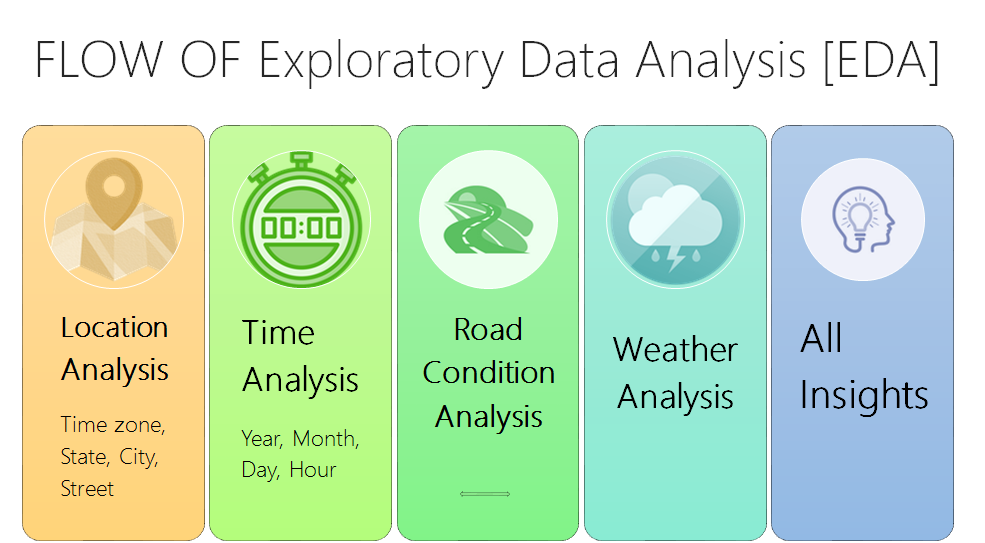


# Data Preparation and Cleaning
1.Load the file using Pandas

2.Look at some information about the data & the columns

3.Fix any missing or incorrect values

In [2]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',20)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape

(7728394, 46)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


### convert bool dtypes int.

In [113]:
# Assuming df is your DataFrame containing boolean columns
df[['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Turning_Loop']] = df[['Amenity', 'Bump', 'Crossing', 
                                             'Give_Way', 'Junction', 'No_Exit', 
                                             'Railway', 'Roundabout', 'Station', 
                                             'Stop', 'Traffic_Calming', 
                                             'Traffic_Signal', 'Turning_Loop']].astype(int)
df



,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,1,0,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,0,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,Day,Day,Day


# missing values and its visualisation
- `conclusion`
- their are 44% missing values in End_Lat and End_Lng.

In [115]:
missing_feature=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in missing_feature:
  print(feature,np.round(df[feature].isnull().mean(),4)*100,'%missing_values')

End_Lat 44.03 %missing_values
End_Lng 44.03 %missing_values
Description 0.0 %missing_values
Street 0.13999999999999999 %missing_values
City 0.0 %missing_values
Zipcode 0.02 %missing_values
Timezone 0.1 %missing_values
Airport_Code 0.29 %missing_values
Weather_Timestamp 1.5599999999999998 %missing_values
Temperature(F) 2.12 %missing_values
Wind_Chill(F) 25.869999999999997 %missing_values
Humidity(%) 2.25 %missing_values
Pressure(in) 1.82 %missing_values
Visibility(mi) 2.29 %missing_values
Wind_Direction 2.27 %missing_values
Wind_Speed(mph) 7.39 %missing_values
Precipitation(in) 28.51 %missing_values
Weather_Condition 2.2399999999999998 %missing_values
Sunrise_Sunset 0.3 %missing_values
Civil_Twilight 0.3 %missing_values
Nautical_Twilight 0.3 %missing_values
Astronomical_Twilight 0.3 %missing_values


In [7]:
missing_pct=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_pct

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

<Axes: >

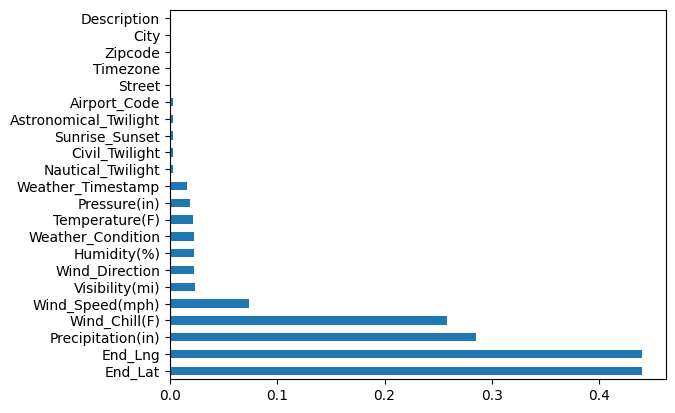

In [8]:
missing_pct[missing_pct!=0].plot(kind='barh')

In [9]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [13]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# `city`
- `conclusion`

- `no data for newyork`
- miami have highest number of accidents
- the number of accident per city decreases exponentially
- approx 9% of city have accident higher then 1000.
- over 1000 city have reportedjust 1 accident.(need to investigate)

In [14]:
df.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [15]:
len(df.City.unique())

13679

# top20 cities with most accidents

In [16]:
accidents_by_cities=df.City.value_counts().head(20)

<Axes: ylabel='City'>

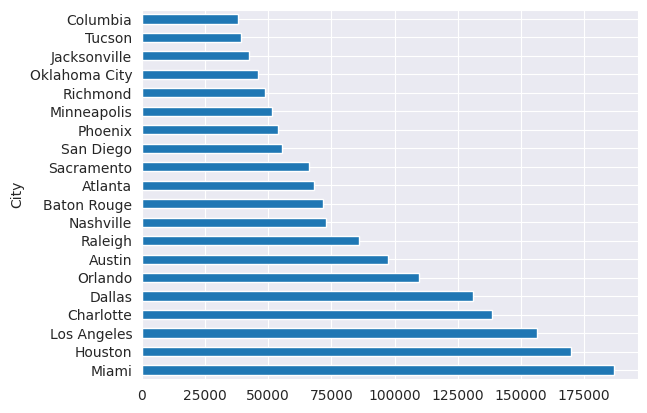

In [17]:
accidents_by_cities.plot(kind='barh')

<Axes: xlabel='count', ylabel='Count'>

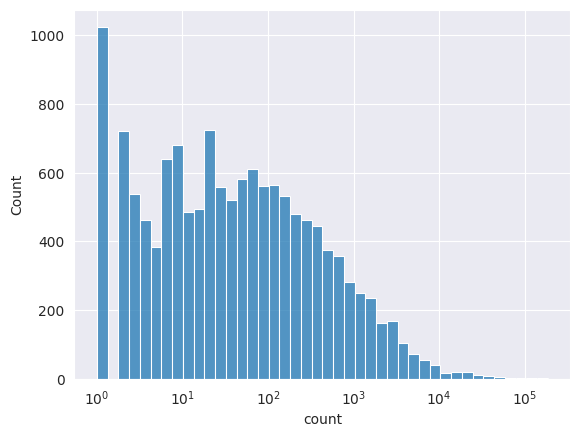

In [27]:
sns.histplot(accidents_by_city,log_scale=True)

In [26]:
accidents_by_city=df.City.value_counts()
low_accident_city=accidents_by_city[accidents_by_city < 1000]
high_accident_city=accidents_by_city[accidents_by_city >= 1000]

In [28]:
len(high_accident_city)/len(low_accident_city)*100


9.775280898876403

<Axes: xlabel='count', ylabel='Density'>

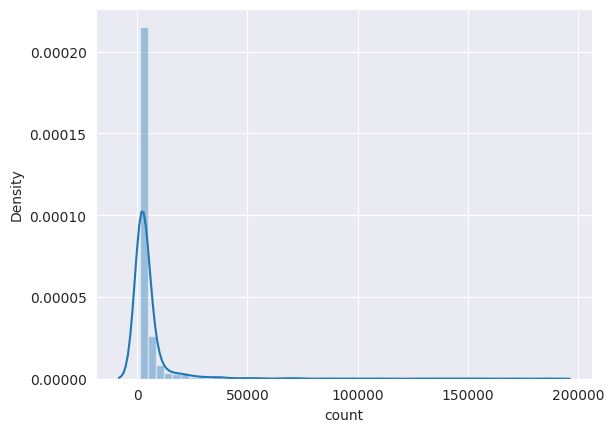

In [29]:
sns.distplot( high_accident_city)

In [21]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'city', 'city':'Cases'})

In [22]:
city_df = city_df.sort_values(by='count', ascending=False)

In [23]:
city_df.head(10)

,City,count
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
5,Orlando,109733
6,Austin,97359
7,Raleigh,86079
8,Nashville,72930
9,Baton Rouge,71588


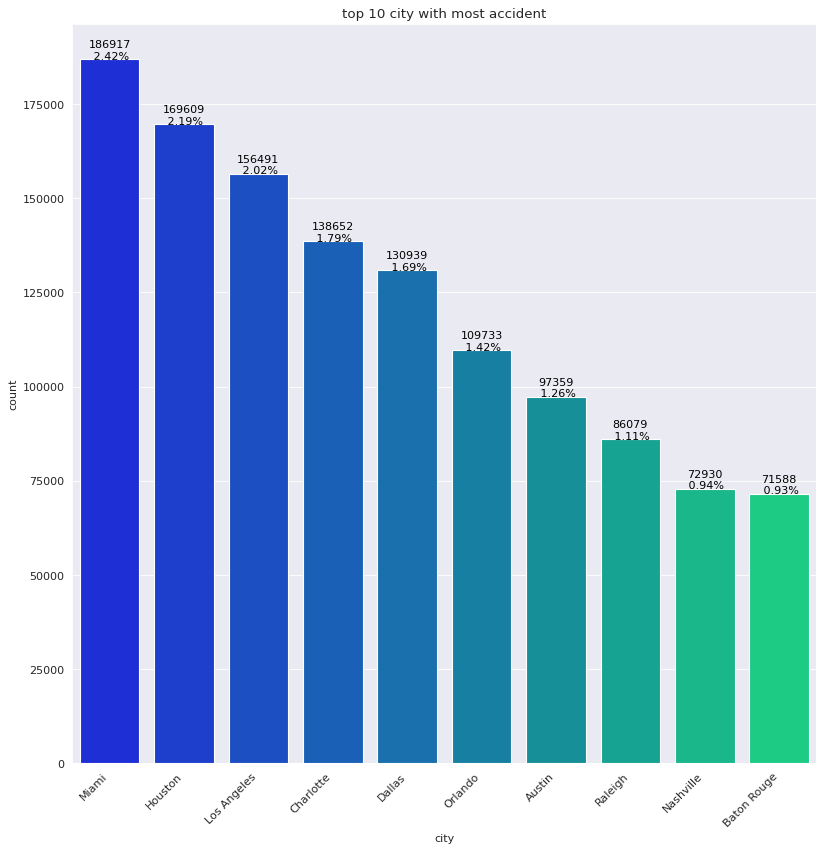

In [73]:
plt.figure(figsize=(12,12),dpi=80)
sns.barplot(y=city_df['count'].head(10), x=city_df['City'].head(10), palette='winter')
total_cases =city_df['count'].sum()
for i ,(index,row) in enumerate(city_df.head(10).iterrows()):
    count=row['count']
    percentage=(row['count']/total_cases)*100
    plt.text(i,row['count'],f'{count}\n {percentage:.2f}%' , ha='center',fontsize=10,color='black')
plt.title('top 10 city with most accident')
plt.xlabel('city')
plt.ylabel('count')
plt.xticks(rotation =45)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.show()

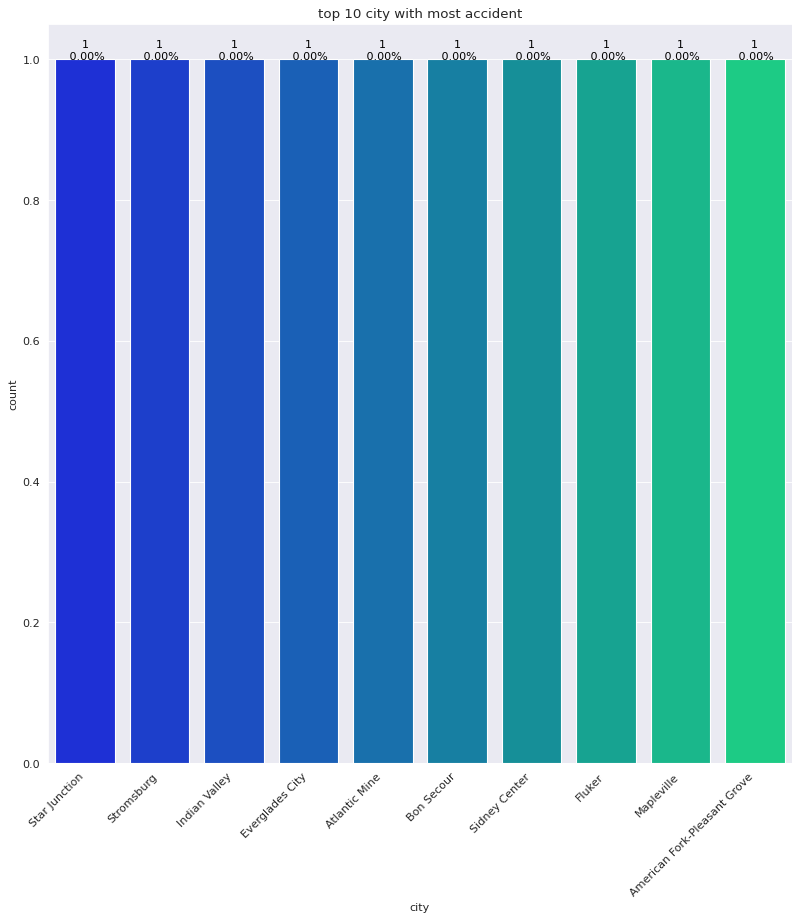

In [74]:
plt.figure(figsize=(12,12),dpi=80)
sns.barplot(y=city_df['count'].tail(10), x=city_df['City'].tail(10), palette='winter')
total_cases =city_df['count'].sum()
for i ,(index,row) in enumerate(city_df.tail(10).iterrows()):
    count=row['count']
    percentage=(row['count']/total_cases)*100
    plt.text(i,row['count'],f'{count}\n {percentage:.2f}%' , ha='center',fontsize=10,color='black')
plt.title('top 10 city with most accident')
plt.xlabel('city')
plt.ylabel('count')
plt.xticks(rotation =45)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.show()

# State
- ` conclusion`
- In US, <span style="color:#ff00ff;">California</span> is the state with the highest number of road accidents in the past 7 years.
- ABOUT  22% of total accident records  of past 7 years in us is only from   <span style="color:#ff00ff;">California</span>.
-  about 11% of total accident records  of past 7 years in us is only from <span style="color:#ff00ff;">Florida</span>.
- In past 7 years, averagely 800 accidents (daily) happened in California implies approximately 28 accidents per hour.
- South Dakota is the city with lowest no. of road accidents in past 7 years.
- Only 289 accidents took place in South Dakota in past 5 years implies yearly 41 cases in average.

In [17]:
df.State

0                Ohio
1                Ohio
2                Ohio
3                Ohio
4                Ohio
              ...    
7728389    California
7728390    California
7728391    California
7728392    California
7728393    California
Name: State, Length: 7728394, dtype: object

In [43]:
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}
df['State']=df['State'].map(us_states)

In [47]:
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'cases':'State'})


In [48]:
state_df = state_df.sort_values(by='count', ascending=False)


In [49]:
state_df

,State,count
0,California,1741433
1,Florida,880192
2,Texas,582837
3,South Carolina,382557
4,New York,347960
...,...,...
44,Wyoming,3757
45,North Dakota,3487
46,Maine,2698
47,Vermont,926


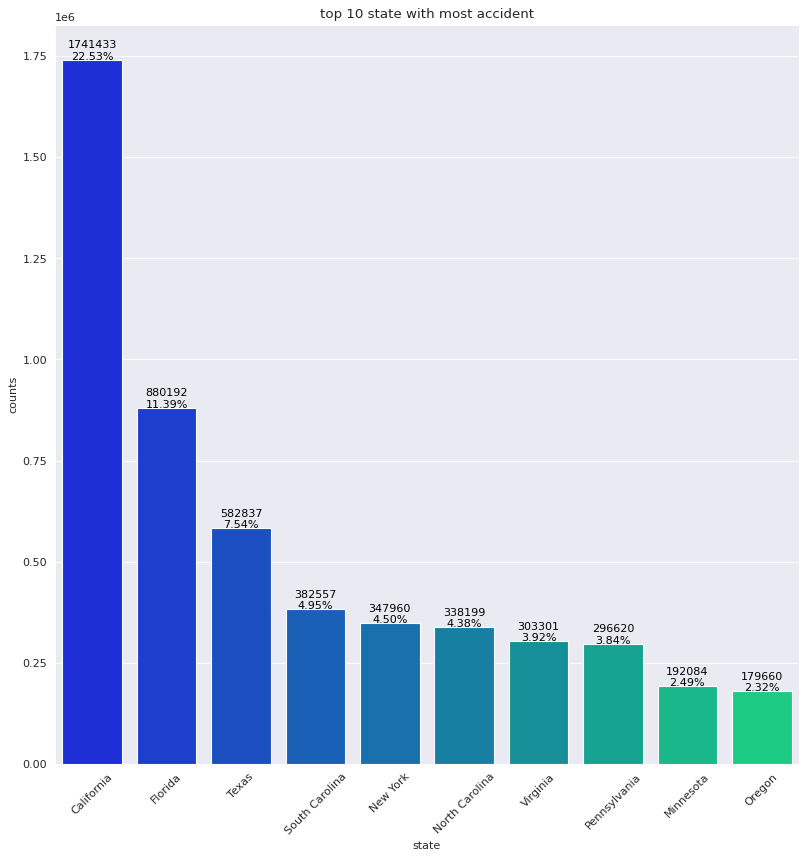

In [60]:
plt.figure(figsize=(12,12),dpi=80)
sns.barplot(y=state_df['count'].head(10), x=state_df['State'].head(10), palette='winter')
total_cases =state_df['count'].sum()
for i ,(index,row) in enumerate(state_df.head(10).iterrows()):
    count=row['count']
    persentage= (row['count']/total_cases)*100
    plt.text(i,row['count'],f'{count}\n{persentage:.2f}%',ha='center',fontsize=10,color='black')
plt.title('top 10 state with most accident')
plt.xlabel('state')
plt.ylabel('counts')
plt.xticks(rotation =45)
plt.show()

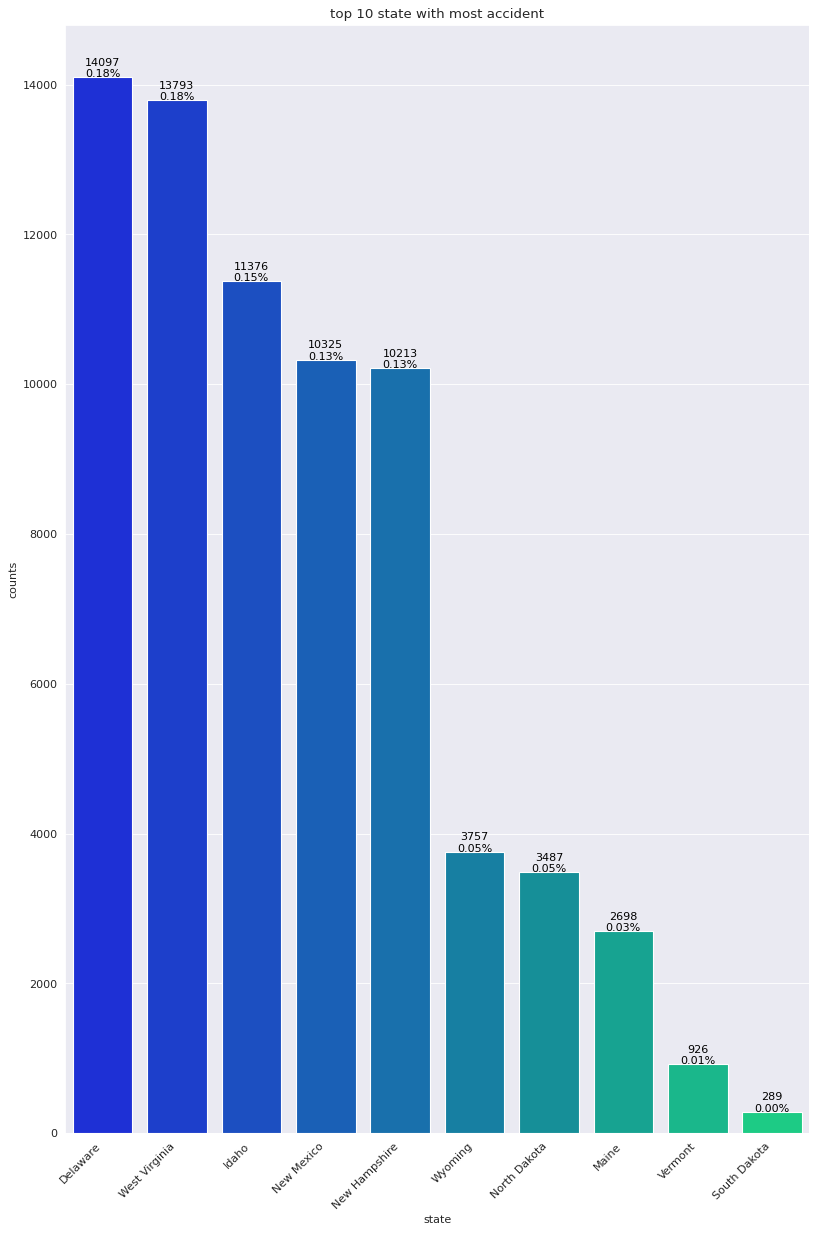

In [72]:
plt.figure(figsize=(12,18),dpi=80)
ax=sns.barplot(y=state_df['count'].tail(10), x=state_df['State'].tail(10), palette='winter')
total_cases =state_df['count'].sum()
for i ,(index,row) in enumerate(state_df.tail(10).iterrows()):
    count=row['count']
    persentage= (row['count']/total_cases)*100
    plt.text(i,row['count'],f'{count}\n{persentage:.2f}%',ha='center',fontsize=10,color='black')
    

plt.title('top 10 state with most accident')
plt.xlabel('state')
plt.ylabel('counts')
plt.xticks(rotation =45)
plt.xticks(rotation=45, ha='right')
plt.show()


# street
- `conclusion`
- In last 7 years (2016-2020) Street No. I-95 N is having the highest road accidents records.
- In Street No. I-95 N, daily 29 accidents occurred in average.
- In Our dataset, there are total 336307 Streets enlisted for accidental cases,

- There are 129,934 street 38.64% in US which have only 1 accident record in past 7 years.

- 97% Streets of US, have less than 100 road accident cases.
-  Only 0.24% Streets in US have the accident cases greater than 1000.

- In last 7 years record of road accidents, only 133 Streets (0.04%) have greater than 5000 cases.

In [ ]:
129,934 street 38.64%
326,421 street 97.06%
335,489 street 99.76%
817 street 0.24%
336,173 street 99.96%
133 street 0.04%
68 street 0.02%

In [90]:
len(df['Street'].unique())

336307

In [64]:
Street_df=pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street','Cases':'Street'})
Street_df

,Street,count
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
...,...,...
336301,W Diamond Valley Dr,1
336302,S Jasper St,1
336303,State RT 17 N,1
336304,S Lake Mary Jane Rd,1


In [70]:
Street_df=Street_df.sort_values(by='count',ascending=False)
Street_df

,Street,count
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
...,...,...
249675,N Lincolnway,1
249674,E Charles Willard St,1
249687,Harper Dr,1
249640,Collingwood Blvd,1


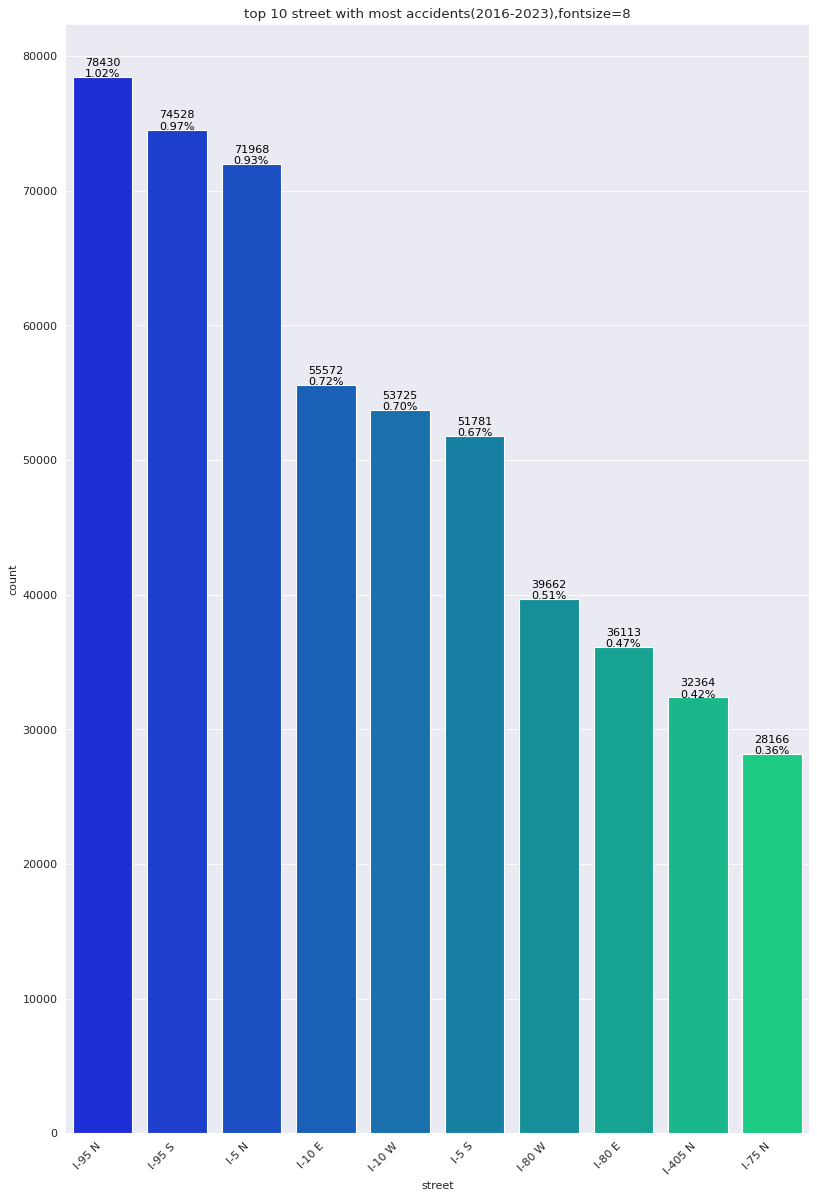

In [72]:
plt.figure(figsize=(12,18),dpi=80)
ax=sns.barplot(y=Street_df['count'].head(10), x=Street_df['Street'].head(10), palette='winter')
total_cases =Street_df['count'].sum()
for i ,(index,row) in enumerate(Street_df.head(10).iterrows()):
    count=row['count']
    persentage= (row['count']/total_cases)*100
    plt.text(i,row['count'],f'{count}\n{persentage:.2f}%',ha='center',fontsize=10,color='black')
    
plt.title('top 10 street with most accidents(2016-2023),fontsize=8')
plt.xlabel('street')
plt.ylabel('count')
plt.xticks(rotation =45)
plt.xticks(rotation=45, ha='right')
plt.show()

In [86]:
def street_cases_percentage(val,operator):
    if operator== '=':
        val = Street_df[Street_df['count']==val].shape[0]
    elif operator== '>':
        val = Street_df[Street_df['count']>val].shape[0]
    elif operator== '<':
        val = Street_df[Street_df['count']<val].shape[0]
    print('{:,d} street {}%'.format(val,round(val*100/Street_df.shape[0],2)))
        
street_cases_percentage(1,'=')
street_cases_percentage(100,'<')
street_cases_percentage(1000,'<')
street_cases_percentage(1000,'>')
street_cases_percentage(5000,'<')
street_cases_percentage(5000,'>')
street_cases_percentage(10000,'>')

129,934 street 38.64%
326,421 street 97.06%
335,489 street 99.76%
817 street 0.24%
336,173 street 99.96%
133 street 0.04%
68 street 0.02%


## temporal variable
- `conclusion`
- Eastern time zone region of US has the highest no. of road accident cases (46%) in past 7 years.
- Mountain time zone region of US has the lowest no. of road accident cases (6%) in past 7 years.
- most of the  accident have occured btw 6 am to 10 am.
- nextmost accident have occured btw 3 pm to 6 pm.
- in nov,dec and jan higher % of accident have occured.(but data is missing for some year)
- weekdays and weekends have huge diff btw its distribution.
- much data is missing from 2016 and maybe in 2017.
- From the above figure, it is clear that in last 7 years (2016-2023) in US accidents percentage has increased significantly(but 2023 data have only 3 month data so we can avoid it).
- In the year 2021, averagely 553 accidents happened per day in US.
- there is a gradual increase in accident per day in usa year wise.
- Compare to 2016 the accident/hour has increased 2.5 times in 2020.
- In the year 2021, averagely 23 accidents happened per hour in US implies that 4 accidents in every 10 minutes.
- Around 11% of the road accidents occurred in the month of December.

- July is month with least (6.8%) no. of road accidents in US.

- 30% of the road accidents occurred only within the 3 months, October to December (i.e., transition period from Autumn to Winter).
- Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days which is as our expectation.
- Only around 15% road accident records occurred in weekend.
- friday of a week is having the highest percentage of road accidents.
- Around 26% of the road accidents occurred in between 6:00AM to 9:00AM.
- In evening, around 27% of the road accidents occurred in between 3:00PM to 6:00PM.
- The most-deadliest accident hour is 7:00PM implies the morning Office-Going Hours.

- The 2nd most-deadliest accident hour is 8:00AM implies the Morning Office-Going Hours.

- On Sunday the percentage of road accidents in US is lowest.

In [27]:
timezone_counts = df['Timezone'].value_counts()
timezone_counts

Timezone
US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: count, dtype: int64

In [34]:
Timezone_df= pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'cases':'Timezone'})
Timezone_df

,Timezone,count
0,US/Eastern,3580167
1,US/Pacific,2062984
2,US/Central,1645616
3,US/Mountain,431819


In [35]:
Timezone_df=Timezone_df.sort_values(by='count',ascending=False)
Timezone_df

,Timezone,count
0,US/Eastern,3580167
1,US/Pacific,2062984
2,US/Central,1645616
3,US/Mountain,431819


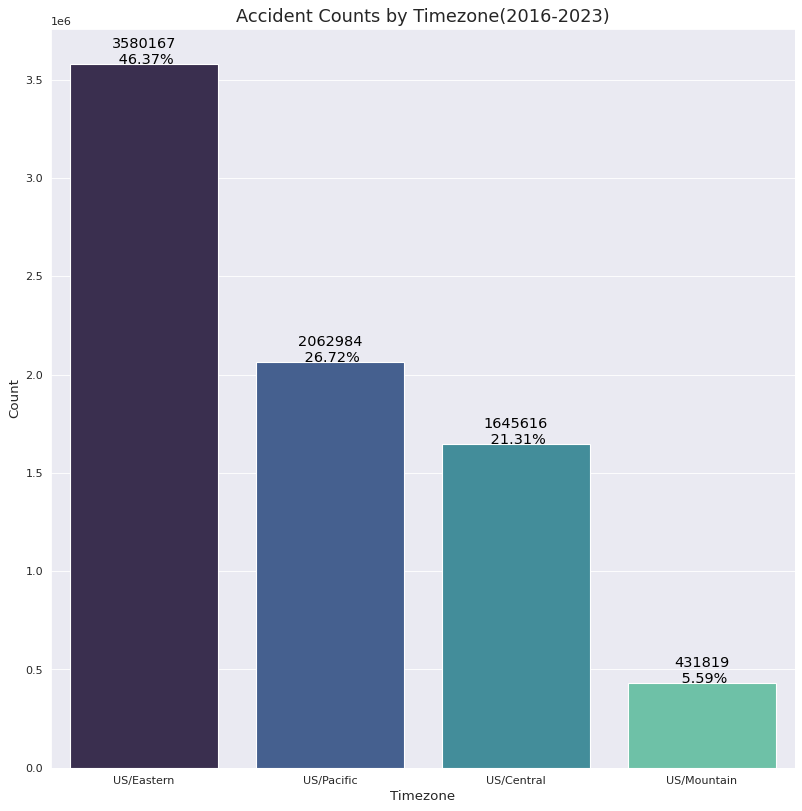

In [46]:
plt.figure(figsize=(12,12),dpi=80)
sns.barplot(y=Timezone_df['count'],x=Timezone_df['Timezone'],palette='mako')
total=Timezone_df['count'].sum()
for i,(index,row) in enumerate(Timezone_df.iterrows()):
    count=row['count']
    percentage=(row['count']/total)*100
    plt.text(i,row['count'],f'{count}\n {percentage:.2f}%',ha='center',color='black',fontsize=13)


plt.title('Accident Counts by Timezone(2016-2023)', fontsize=16)
plt.xlabel('Timezone', fontsize=12)
plt.ylabel('Count', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

In [7]:
year_df= pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index()
year_df.columns = ['year', 'count']

In [8]:
year_df=year_df.sort_values(by='year')
year_df

,year,count
6,2016.0,410821
5,2017.0,717290
4,2018.0,893426
3,2019.0,954302
2,2020.0,1161598
0,2021.0,1412433
1,2022.0,1268806
7,2023.0,166552


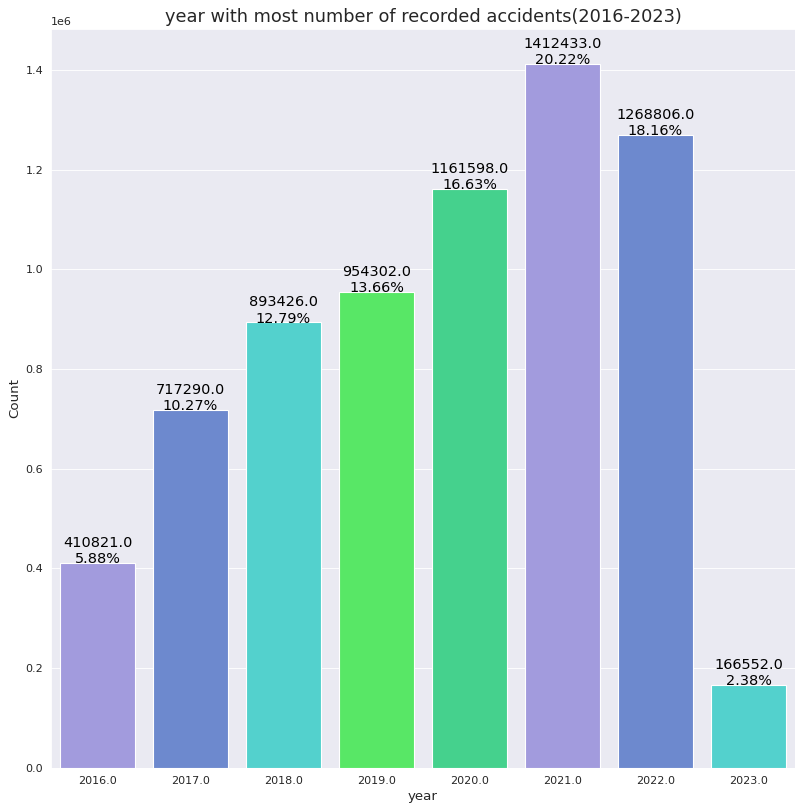

In [88]:
plt.figure(figsize=(12,12),dpi=80)
sns.barplot(y=year_df['count'], x=year_df['year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])
total=year_df['count'].sum()
for i,(index,row) in enumerate(year_df.iterrows()):
    count=row['count']
    percentage=(row['count']/total)*100
    plt.text(i,row['count'],f'{count}\n{percentage:.2f}%',ha='center',color='black',fontsize=13)

plt.title('year with most number of recorded accidents(2016-2023)', fontsize=16)
plt.xlabel('year', fontsize=12)
plt.ylabel('Count', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

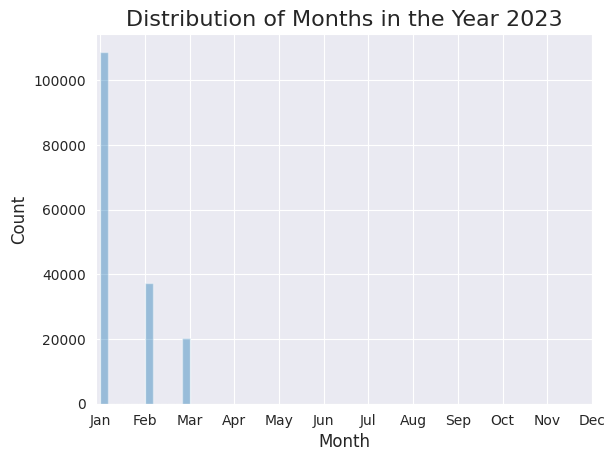

In [99]:
df1=df[df.Start_Time.dt.year==2023]
sns.distplot(df1.Start_Time.dt.month,bins=12,kde=False)
plt.title('Distribution of Months in the Year 2023', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show plot
plt.show()

In [25]:
year_df['avg_accident_per_day']=round(year_df['count']/(365*7))
year_df['avg_accident_per_hour']=round(year_df['count']/(365*7*24))
year_df

,year,count,avg_accident_per_day,avg_accident_per_hour
6,2016.0,410821,161.0,7.0
5,2017.0,717290,281.0,12.0
4,2018.0,893426,350.0,15.0
3,2019.0,954302,374.0,16.0
2,2020.0,1161598,455.0,19.0
0,2021.0,1412433,553.0,23.0
1,2022.0,1268806,497.0,21.0
7,2023.0,166552,65.0,3.0


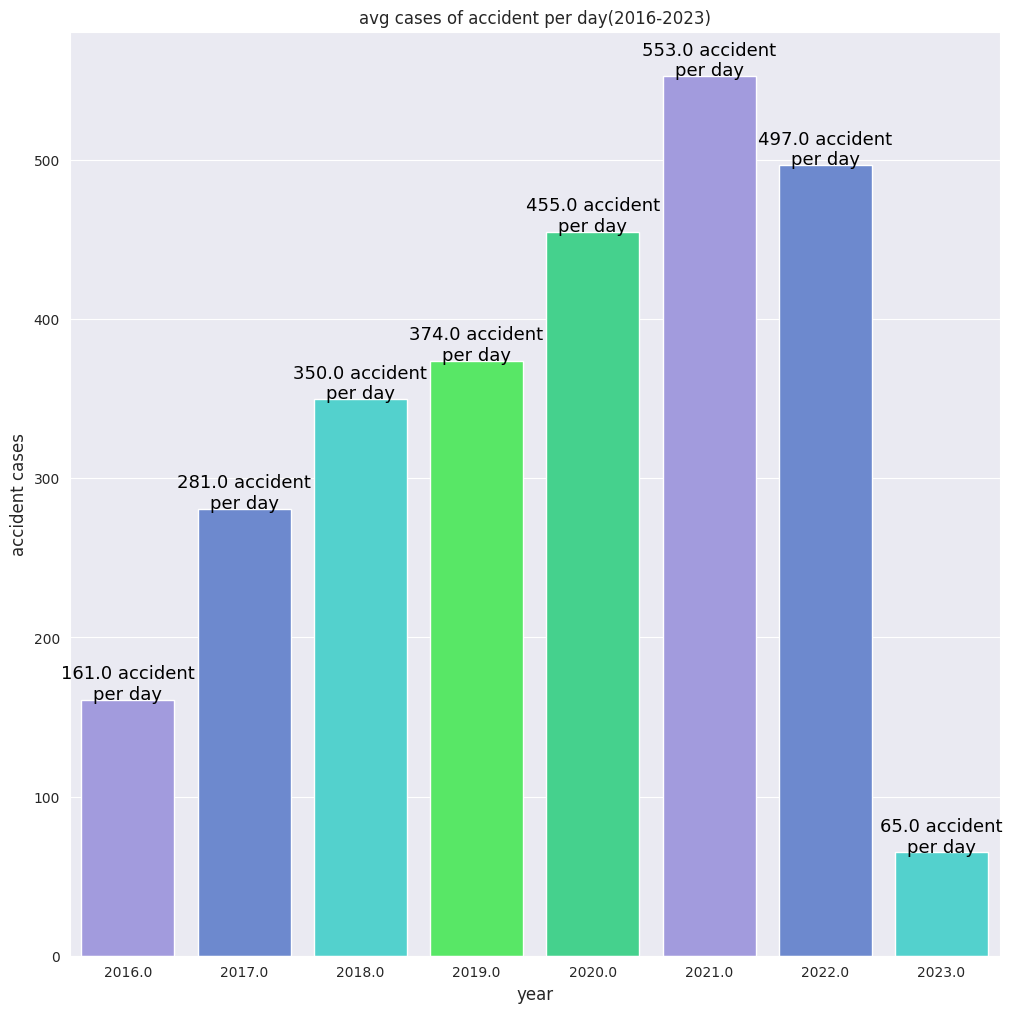

In [29]:
plt.figure(figsize=(12,12))
sns.barplot(y=year_df['avg_accident_per_day'], x=year_df['year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])
for i,(index,row) in enumerate(year_df.iterrows()):
    count=row['avg_accident_per_day']
    plt.text(i,count,f'{count} accident\nper day',ha='center',color='black',fontsize=13)

plt.title('avg cases of accident per day(2016-2023)', fontsize=12)
plt.xlabel('year', fontsize=12)
plt.ylabel('accident cases', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

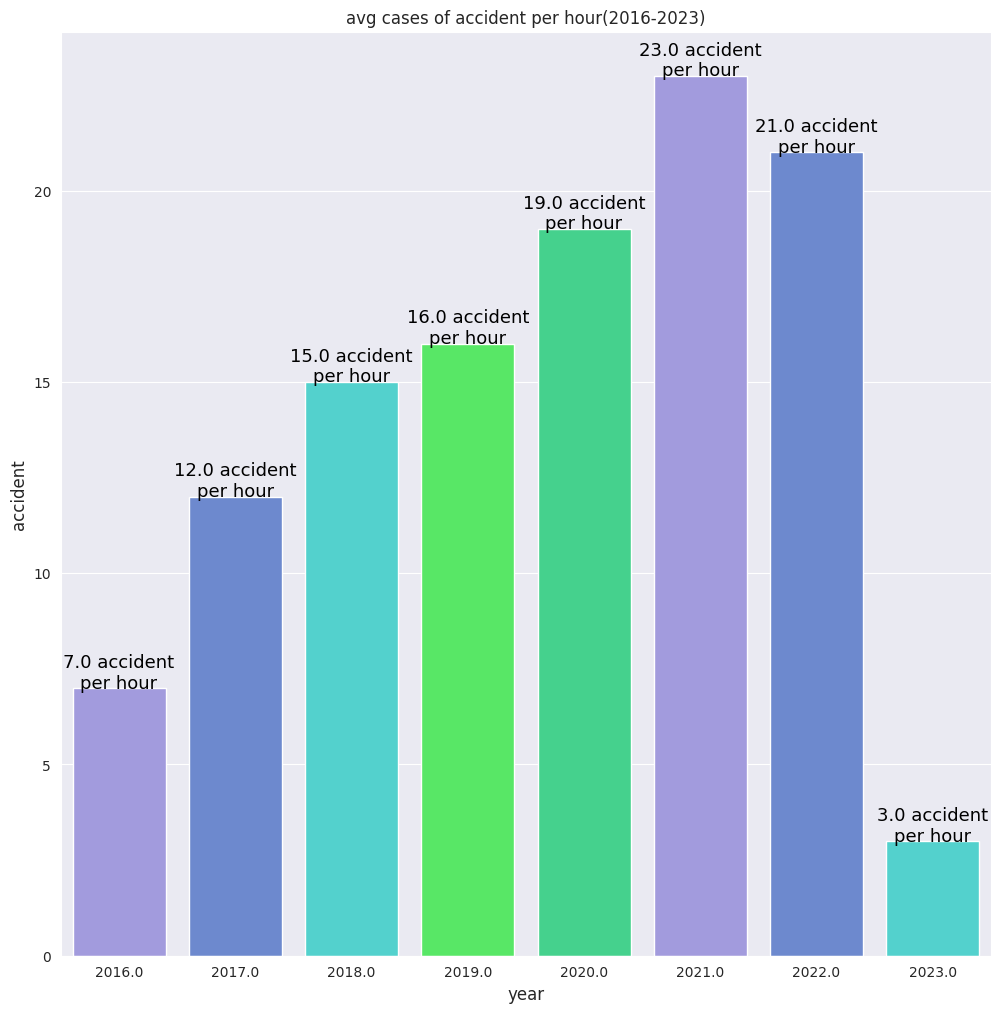

In [30]:
plt.figure(figsize=(12,12))
sns.barplot(y=year_df['avg_accident_per_hour'], x=year_df['year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])
for i,(index,row) in enumerate(year_df.iterrows()):
    count=row['avg_accident_per_hour']
    plt.text(i,count,f'{count} accident\nper hour',ha='center',color='black',fontsize=13)

plt.title('avg cases of accident per hour(2016-2023)', fontsize=12)
plt.xlabel('year', fontsize=12)
plt.ylabel('accident', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

In [67]:
df1 = df[df.Start_Time.dt.year != 2023]

# Step 2: Count occurrences of each month in the filtered DataFrame
month_counts = df1.Start_Time.dt.month.value_counts().sort_index()

# Step 3: Create the 'month_df' DataFrame with month counts
month_df = pd.DataFrame({'month': month_counts.index, 'count': month_counts.values})

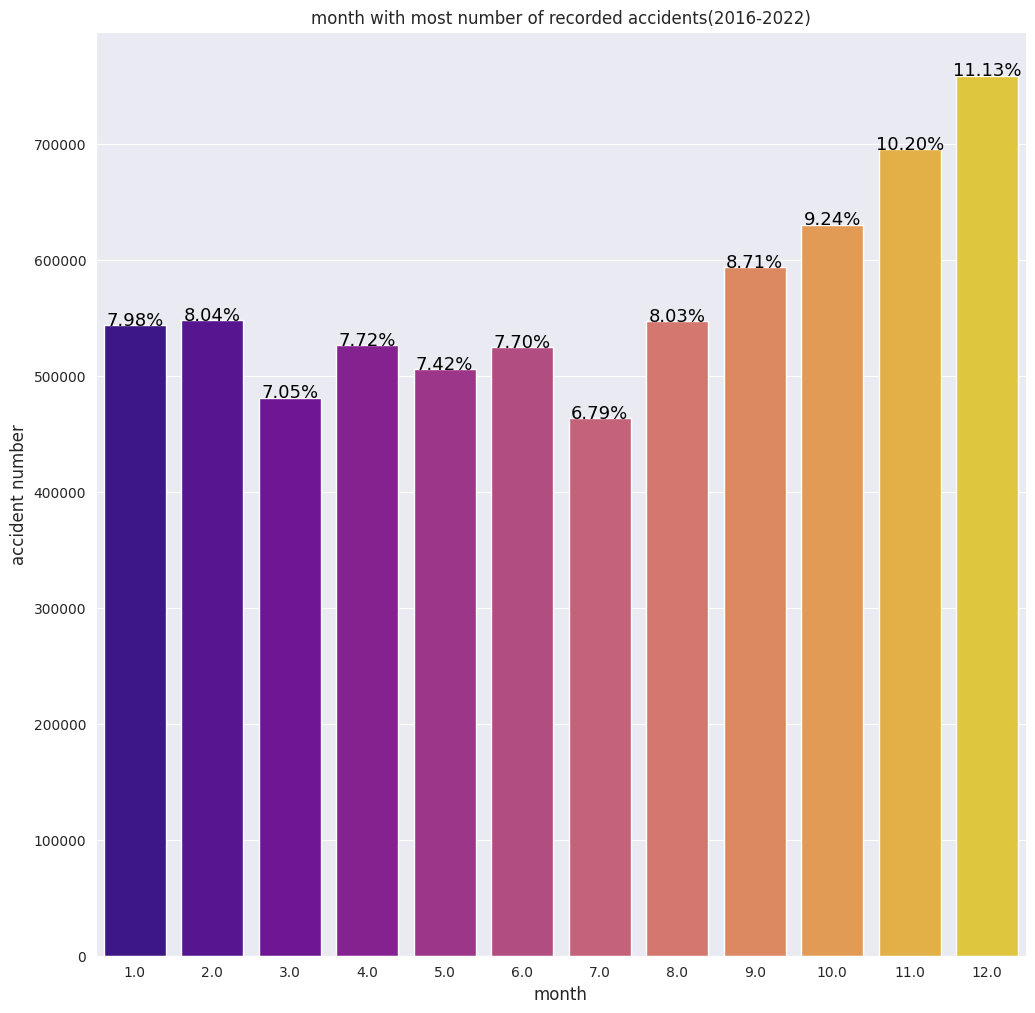

In [89]:
plt.figure(figsize=(12,12))
sns.barplot(y=month_df['count'], x=month_df['month'], palette='plasma')
total=month_df['count'].sum()
for i,(index,row) in enumerate(month_df.iterrows()):
    percentage=(row['count']/total)*100
    plt.text(i,row['count'],f'{percentage:.2f}%',ha='center',color='black',fontsize=13)

plt.title('month with most number of recorded accidents(2016-2022)', fontsize=12)
plt.xlabel('month', fontsize=12)
plt.ylabel('accident number', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

In [72]:
df1=df[df.Start_Time.dt.year!=2023]
day_count=df1.Start_Time.dt.day_name().value_counts().sort_index()
day_df=pd.DataFrame({'day':day_count.index,'count':day_count.values})
day_df


,day,count
0,Friday,1210255
1,Monday,1083775
2,Saturday,563577
3,Sunday,471485
4,Thursday,1170444
5,Tuesday,1149980
6,Wednesday,1169160


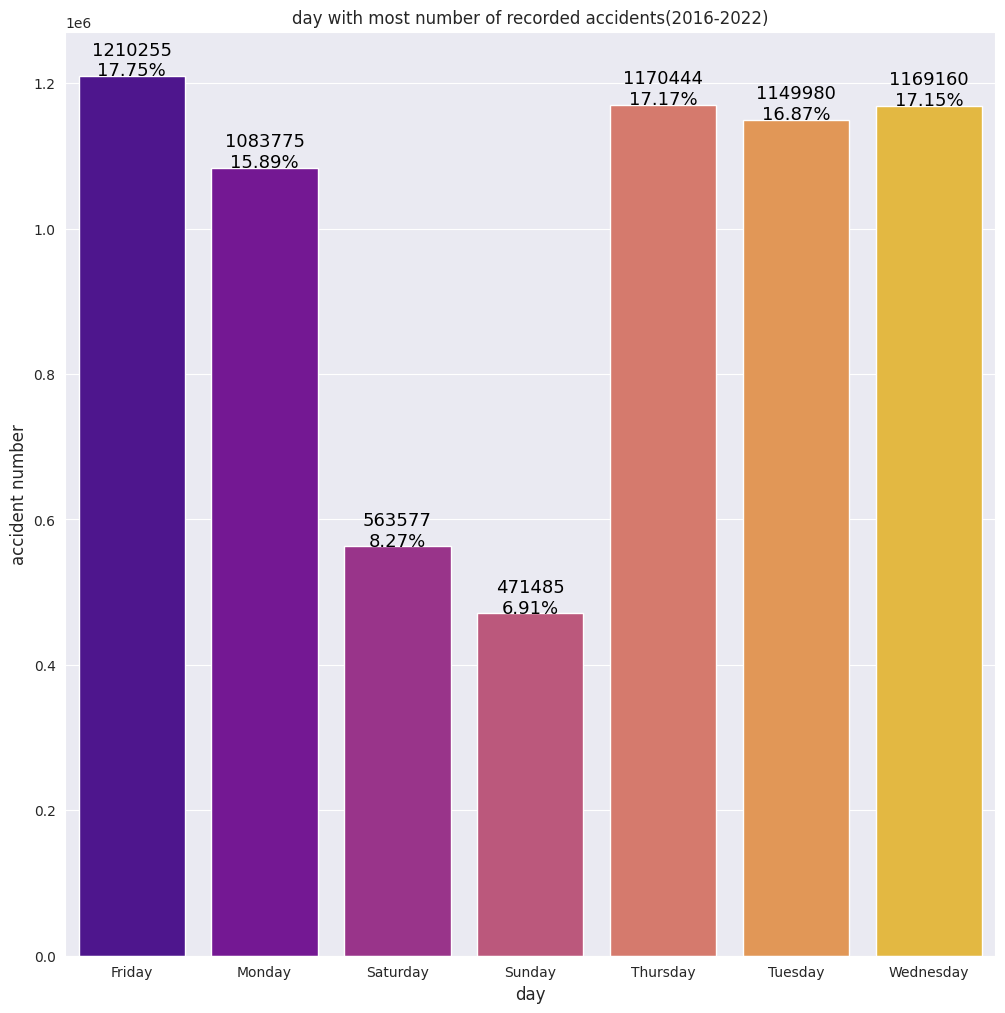

In [88]:
plt.figure(figsize=(12,12))
sns.barplot(y=day_df['count'], x=day_df['day'], palette='plasma')
total=day_df['count'].sum()
for i,(index,row) in enumerate(day_df.iterrows()):
    count=row['count']
    percentage=(row['count']/total)*100
    plt.text(i,row['count'],f'{count}\n{percentage:.2f}%',ha='center',color='black',fontsize=13)

plt.title('day with most number of recorded accidents(2016-2022)', fontsize=12)
plt.xlabel('day', fontsize=12)
plt.ylabel('accident number', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

In [84]:
df1=df[df.Start_Time.dt.year!=2023]
hour_count=df1.Start_Time.dt.hour.value_counts().sort_index()
hour_df=pd.DataFrame({'hour':hour_count.index,'count':hour_count.values})
hour_df

,hour,count
0,0.0,95325
1,1.0,83168
2,2.0,79871
3,3.0,71979
4,4.0,146606
...,...,...
19,19.0,260480
20,20.0,196731
21,21.0,164743
22,22.0,144553


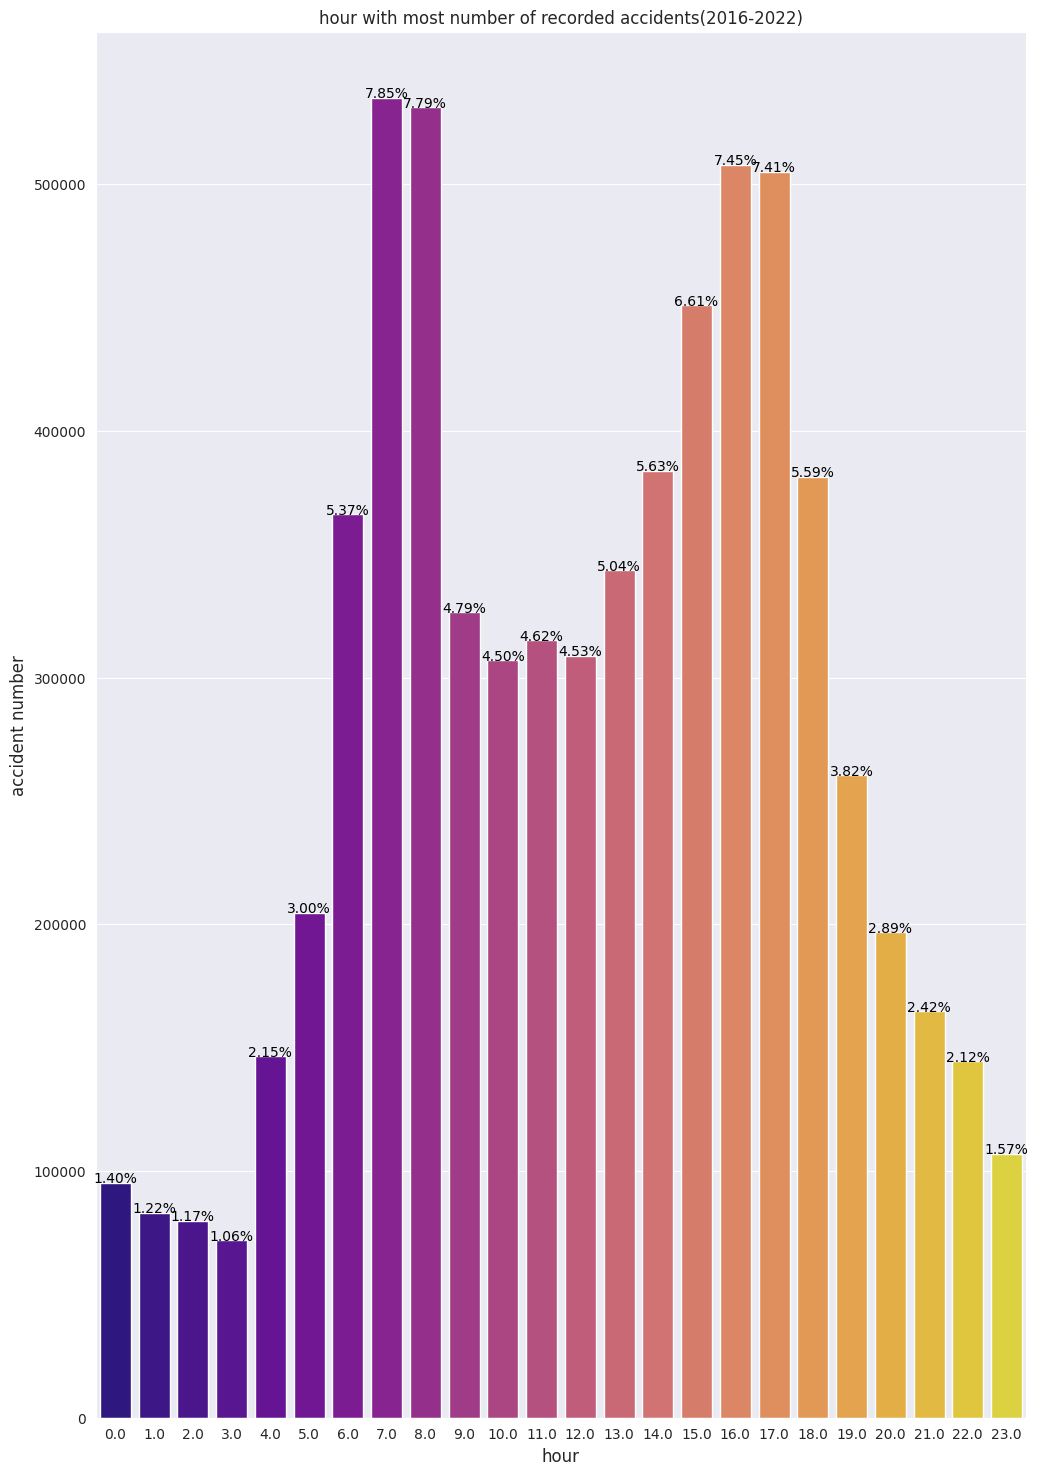

In [87]:
plt.figure(figsize=(12,18))
sns.barplot(y=hour_df['count'], x=hour_df['hour'], palette='plasma')
total=hour_df['count'].sum()
for i,(index,row) in enumerate(hour_df.iterrows()):

    percentage=(row['count']/total)*100
    plt.text(i,row['count'],f'{percentage:.2f}%',ha='center',color='black',fontsize=10)

plt.title('hour with most number of recorded accidents(2016-2022)', fontsize=12)
plt.xlabel('hour', fontsize=12)
plt.ylabel('accident number', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

In [6]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'],errors='coerce')

In [7]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [24]:
len(df['Start_Time'].unique())

6131796

In [25]:
df.Start_Time=pd.to_datetime(df.Start_Time, errors='coerce')

In [26]:
df.Start_Time.dt.hour

0           5.0
1           6.0
2           6.0
3           7.0
4           7.0
           ... 
7728389    18.0
7728390    19.0
7728391    19.0
7728392    19.0
7728393    18.0
Name: Start_Time, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Time'>

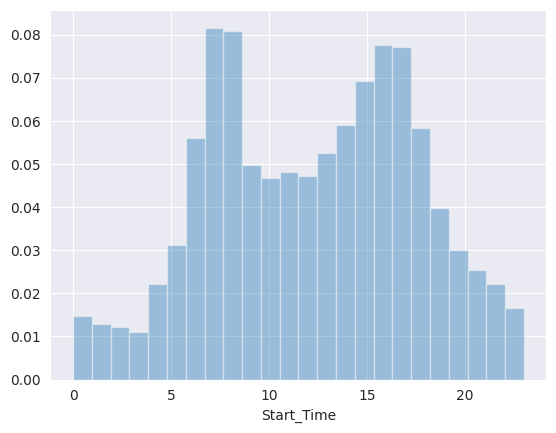

In [65]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

In [28]:
df.Start_Time.dt.month

0          2.0
1          2.0
2          2.0
3          2.0
4          2.0
          ... 
7728389    8.0
7728390    8.0
7728391    8.0
7728392    8.0
7728393    8.0
Name: Start_Time, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Time'>

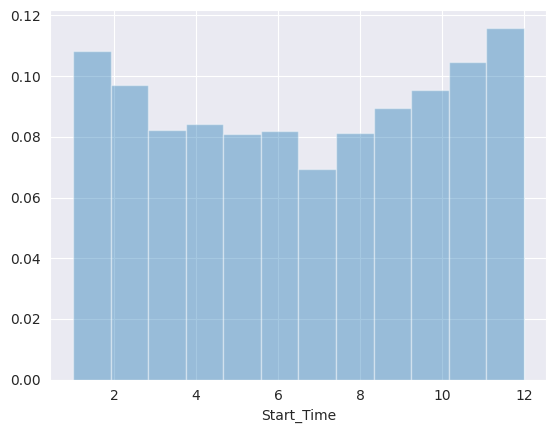

In [95]:
df1=df[df.Start_Time.dt.year!=2016]
sns.distplot(df1.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

In [46]:
df.Source.unique()

array(['Source2', 'Source3', 'Source1'], dtype=object)

### there seems to be iisue with source1 and source3  data.

<Axes: xlabel='Start_Time'>

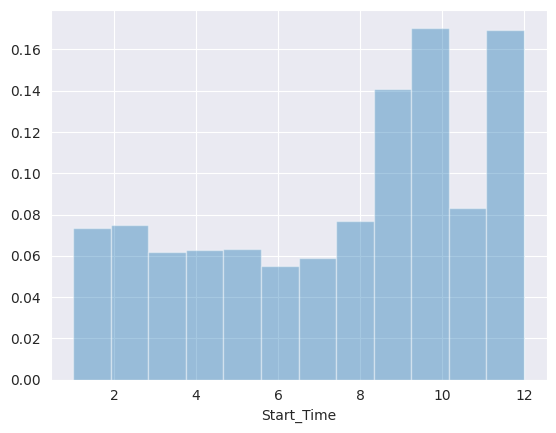

In [66]:
df_2019=df[df.Start_Time.dt.year==2019]
df_source=df_2019[df_2019.Source=='Source1']
sns.distplot(df_source.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

In [30]:
df.Start_Time.dt.dayofweek

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
7728389    4.0
7728390    4.0
7728391    4.0
7728392    4.0
7728393    4.0
Name: Start_Time, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Time'>

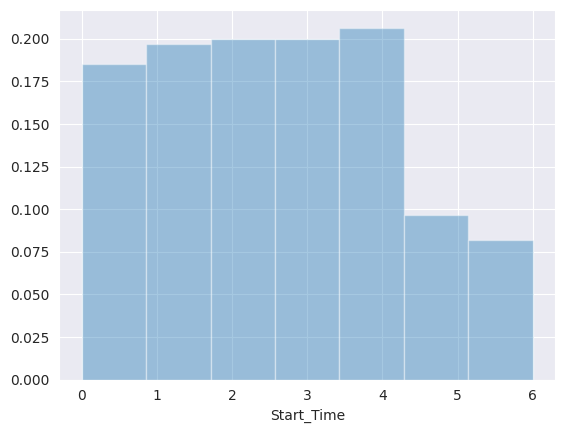

In [62]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

### on sunday peak occurs btw 10 to 6 pm.

<Axes: xlabel='Start_Time'>

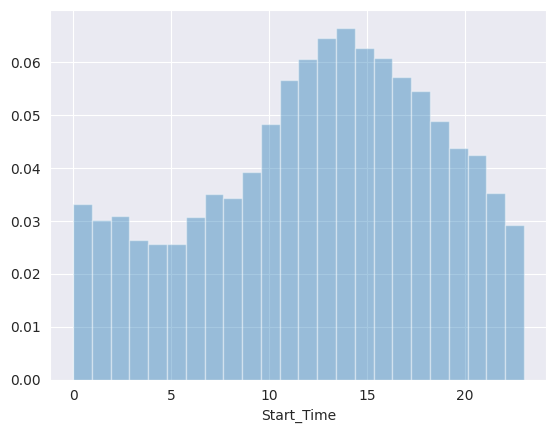

In [61]:
sunday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sunday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

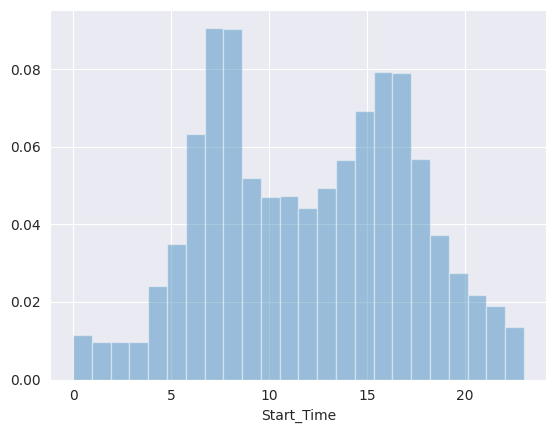

In [60]:
monday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)
plt.show()

<Axes: ylabel='count'>

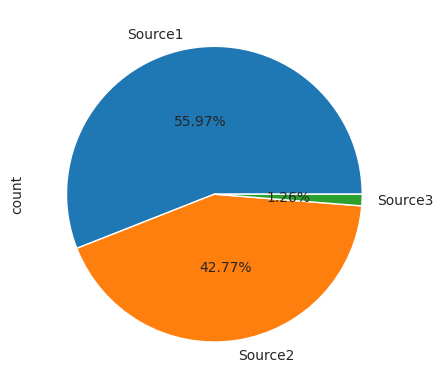

In [59]:
df.Source.value_counts().plot(kind='pie',autopct='%.2f%%',pctdistance=0.5)

# Severity Analysis
- `conclusion`
- 80% of the road accident have moderate level severity-2.
- 2.5% of the road accidents have highlevel severity-4.

In [3]:
df.Severity

0          3
1          2
2          2
3          3
4          2
          ..
7728389    2
7728390    2
7728391    2
7728392    2
7728393    2
Name: Severity, Length: 7728394, dtype: int64

In [5]:
Severity_df=pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity','Cases':'Severity'})
Severity_df

,Severity,count
0,2,6156981
1,3,1299337
2,4,204710
3,1,67366


# year analysis on severity count



In [101]:
df['year']=df.Start_Time.dt.year

In [103]:
severity_year_df=df.groupby(['year','Severity']).size().unstack()
severity_year_df

Severity,1,2,3,4
year,,,,
2016.0,225.0,270026.0,126215.0,14355.0
2017.0,282.0,461819.0,231093.0,24096.0
2018.0,259.0,574668.0,292706.0,25793.0
2019.0,203.0,688144.0,237853.0,28102.0
2020.0,28369.0,917169.0,185348.0,30712.0
2021.0,151.0,1237068.0,148085.0,27129.0
2022.0,37875.0,1123274.0,77957.0,29700.0
2023.0,NaN,161710.0,NaN,4842.0


<Figure size 960x960 with 0 Axes>

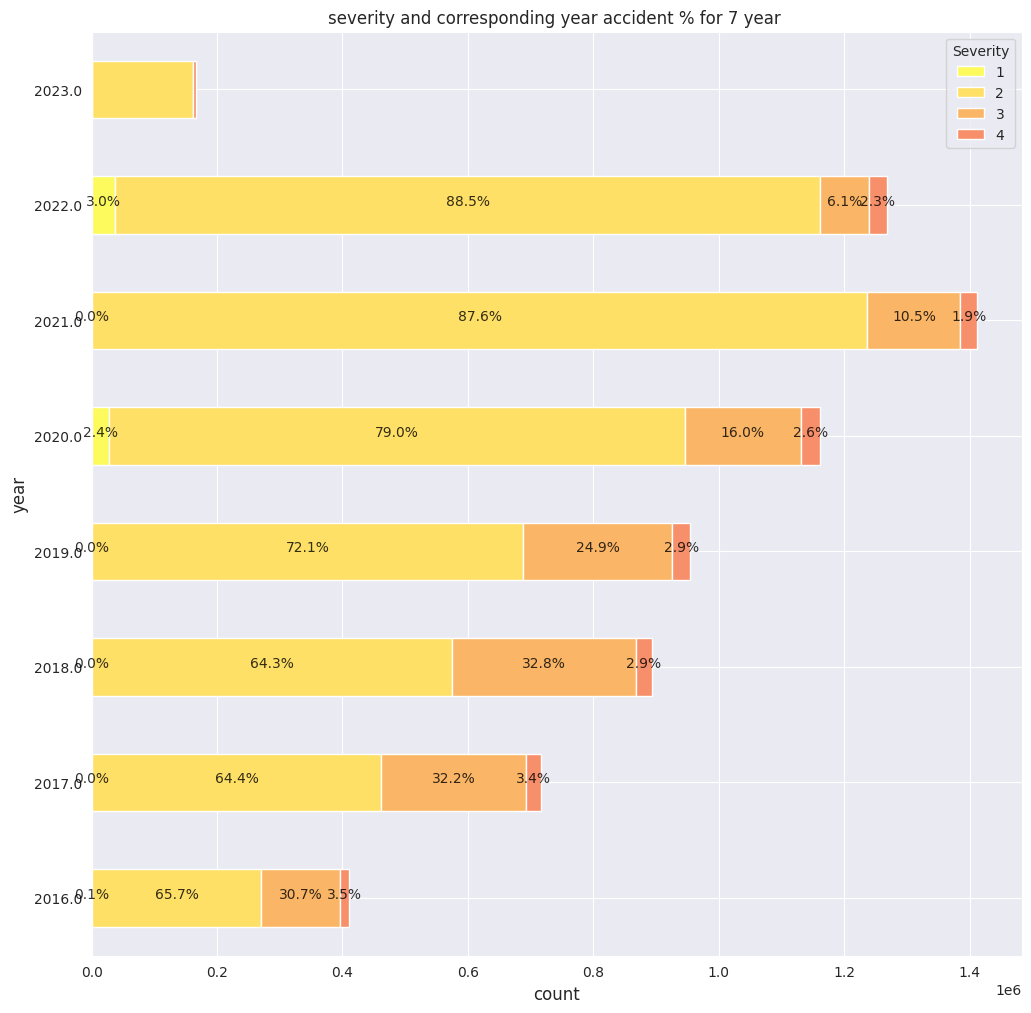

In [110]:
plt.figure(figsize=(12,12),dpi=80)
severity_year_df.plot(kind='barh',stacked=True,figsize=(12,12), color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],
                               rot=0)

for  idx,year in enumerate(severity_year_df.index):
    total=severity_year_df.loc[year].sum()
    x_position = 0
    for col in severity_year_df.columns:
        value=severity_year_df.loc[year,col]
        percentage=(value/total)*100
        plt.text(x_position+(value/2),idx,f'{percentage:.1f}%',ha='center',color='black',fontsize=10,alpha= 0.8)
        x_position +=value
plt.title('severity and corresponding year accident % for 7 year ', fontsize=12)
plt.xlabel('count', fontsize=12)
plt.ylabel('year', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

# Accident duration analysis
- `conclusion`
- From the above plot, it is inferred that majority (39%) of road accidents, have impacted on the traffic flow for 6 hours in last 7 years.

In [36]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [39]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Cases':'DurationC'})

In [44]:

Duration =[str(i).split('days')[-1].strip() for i  in top10_accident_duration_df.Duration]
top_10_accident_duration_df['Duration']= Duration

In [47]:
top_10_accident_duration_df=top_10_accident_duration_df.sort_values(by='Duration',ascending=False)

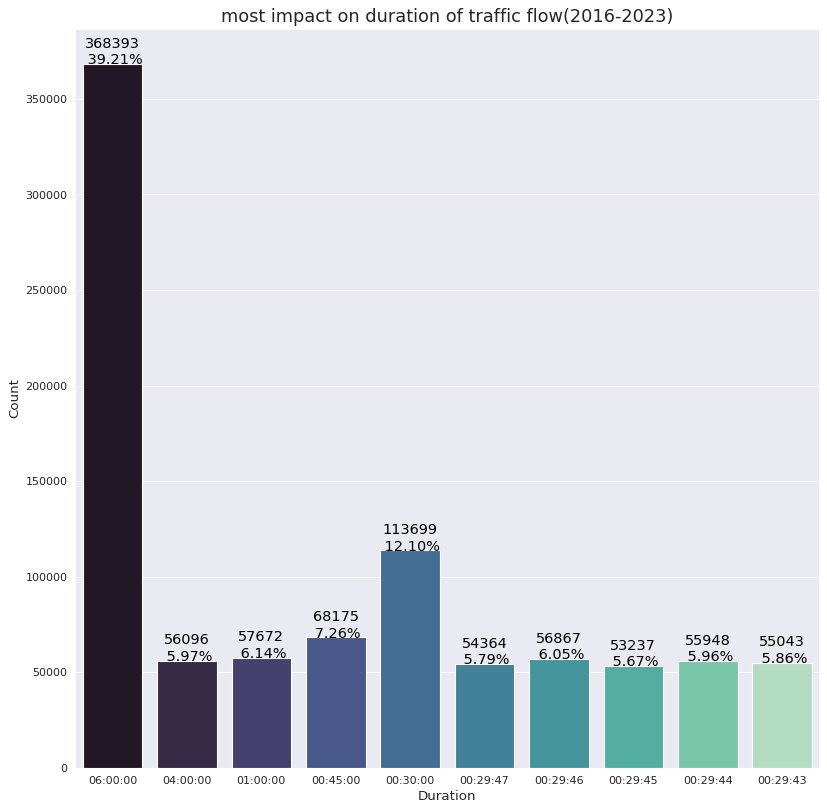

In [48]:
plt.figure(figsize=(12,12),dpi=80)
sns.barplot(y=top_10_accident_duration_df['count'],x=top_10_accident_duration_df['Duration'],palette='mako')
total=top_10_accident_duration_df['count'].sum()
for i,(index,row) in enumerate(top_10_accident_duration_df.head(10).iterrows()):
    count=row['count']
    percentage=(row['count']/total)*100
    plt.text(i,row['count'],f'{count}\n {percentage:.2f}%',ha='center',color='black',fontsize=13)


plt.title('most impact on duration of traffic flow(2016-2023)', fontsize=16)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

# Road Condition Analysis
- `conclusion`
- Almost in every case (99.95%) Bumper was absent in the accident spot.

-  In 11.31% cases, road accidents happened near the crossing.

- In 97.23% cases, there were no Stop near the accident area.

- 7.37% road accident cases recorded near the junctions.

- There are no accident cases recorded near the Turning Loop.

- 14.80% road accident cases recorded near the traffic signal.

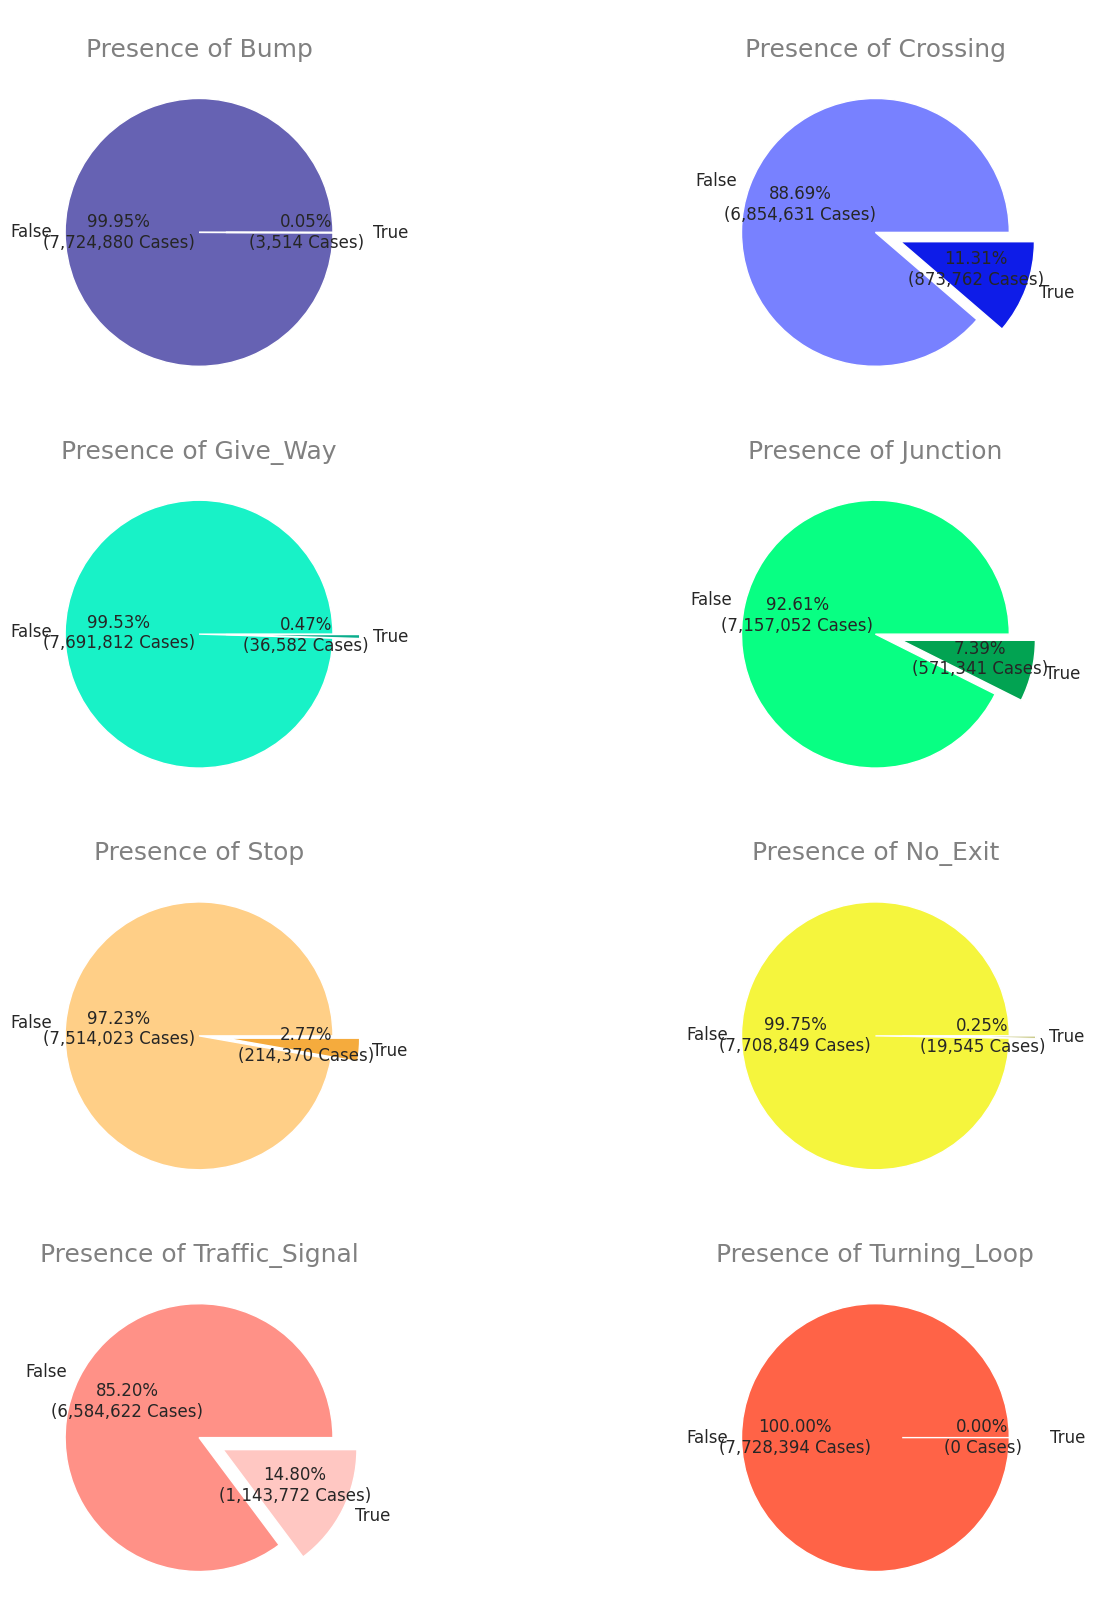

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))
road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]    
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    
    
    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')
    
    count += 1
        

# weather analysis

## temperature
- `conclusion`
-  In the temperature range of 61(F) - 91(F), 45% of the road accidents occurred.

In [26]:
df['Temperature(F)'].max()

207.0

In [16]:
temp_count=df['Temperature(F)'].value_counts().sort_index()
temp_df=pd.DataFrame({'temperature':temp_count.index,'count':temp_count.values})
temp_df=temp_df.sort_values(by='count',ascending=False)
temp_df

,temperature,count
610,77.0,170991
586,73.0,170898
556,68.0,163767
580,72.0,160498
598,75.0,158448
...,...,...
55,-16.2,1
53,-16.8,1
3,-50.0,1
75,-12.1,1


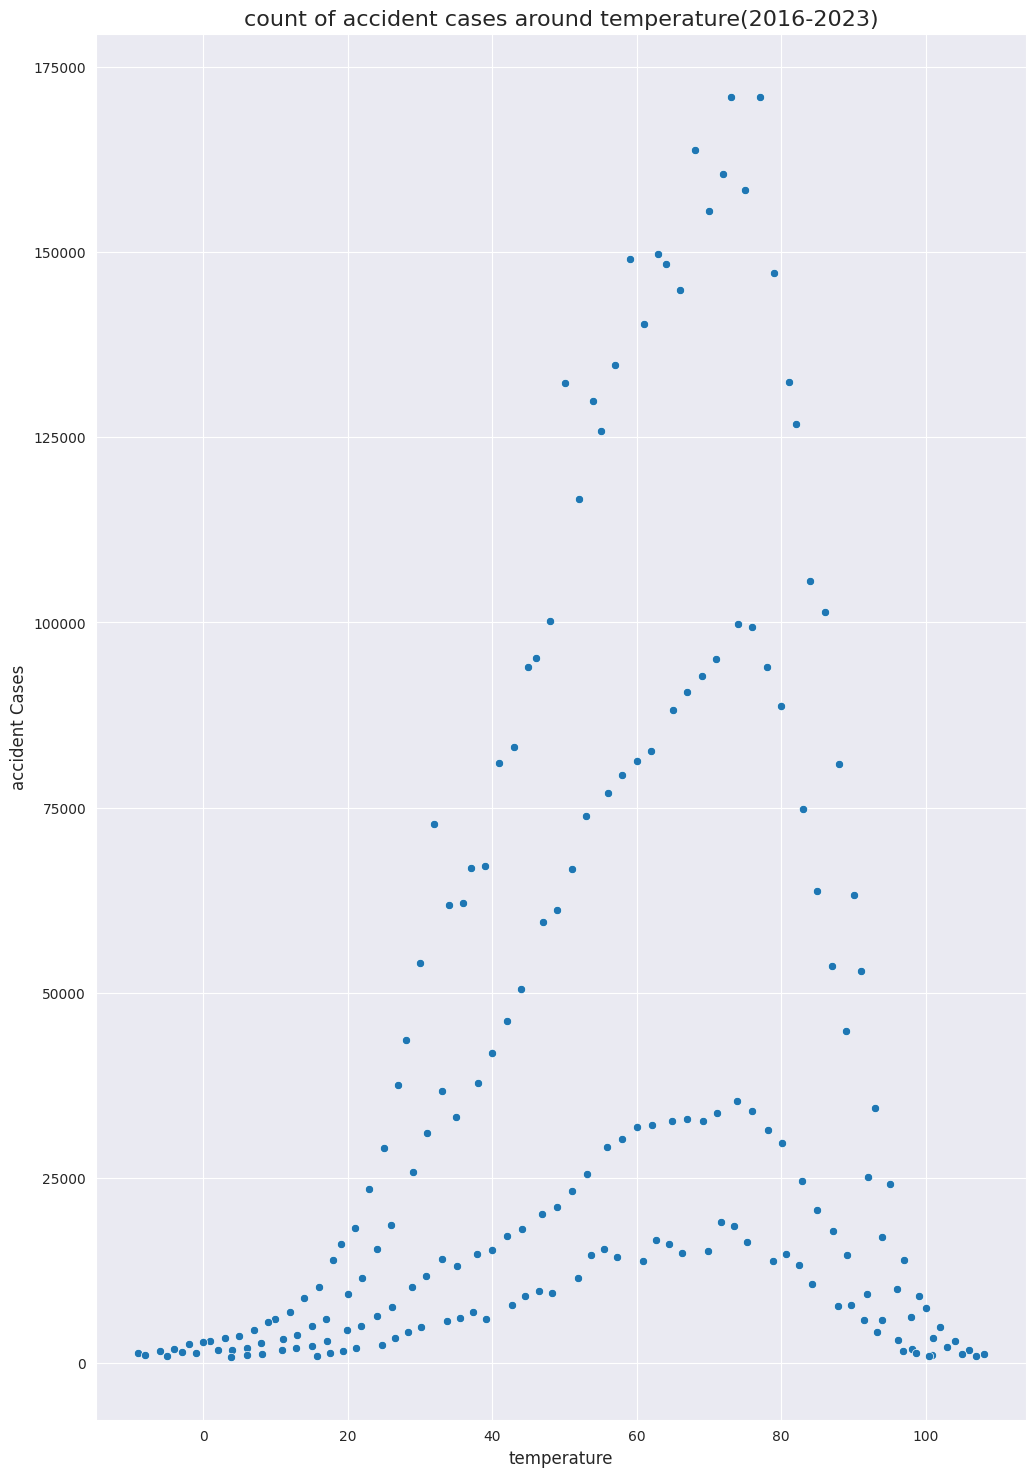

In [22]:
plt.figure(figsize=(12,18),dpi=100)
sns.scatterplot(y=temp_df['count'].head(200),x=temp_df['temperature'].head(200),palette='mako')

plt.title('count of accident cases around temperature(2016-2023)', fontsize=16)
plt.xlabel('temperature', fontsize=12)
plt.ylabel('accident Cases', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

## Humidity(%)
- In maximum cases of road accident, the humidity range is between 80% - 90%.

In [25]:
df['Humidity(%)']

0           91.0
1          100.0
2          100.0
3           96.0
4           89.0
           ...  
7728389     40.0
7728390     73.0
7728391     64.0
7728392     81.0
7728393     47.0
Name: Humidity(%), Length: 7728394, dtype: float64

In [29]:
hum_count=df['Humidity(%)'].value_counts().sort_index()
hum_df=pd.DataFrame({'humidity':hum_count.index,'count':hum_count.values})
hum_df=hum_df.sort_values(by='count',ascending=False)
hum_df

,humidity,count
92,93.0,290345
99,100.0,286680
86,87.0,169582
89,90.0,166492
88,89.0,140593
...,...,...
4,5.0,4113
3,4.0,2167
2,3.0,670
1,2.0,189


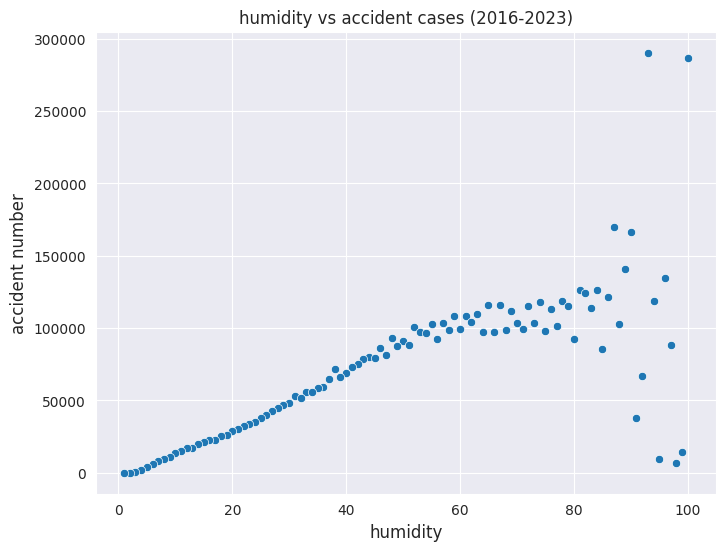

In [39]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(y=hum_df['count'], x=hum_df['humidity'], palette='plasma')

plt.title('humidity vs accident cases (2016-2023)', fontsize=12)
plt.xlabel('humidity', fontsize=12)
plt.ylabel('accident number', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

## Pressure(in)
- `conclusion`
-  In majority road accident cases, the air pressure range is between 20(in) - 30(in).

In [37]:
len(df['Pressure(in)'].unique())

1145

In [53]:
pres_count= df['Pressure(in)'].value_counts().sort_index()
pres_df=pd.DataFrame({'Pressure':pres_count.index,'count':pres_count.values})
pres_df=pres_df.sort_values(by='count',ascending=False)
pres_df

,Pressure,count
1010,29.96,123289
1013,29.99,121836
1015,30.01,119735
1008,29.94,119000
1018,30.04,113905
...,...,...
196,21.70,1
6,2.98,1
5,0.39,1
200,21.77,1


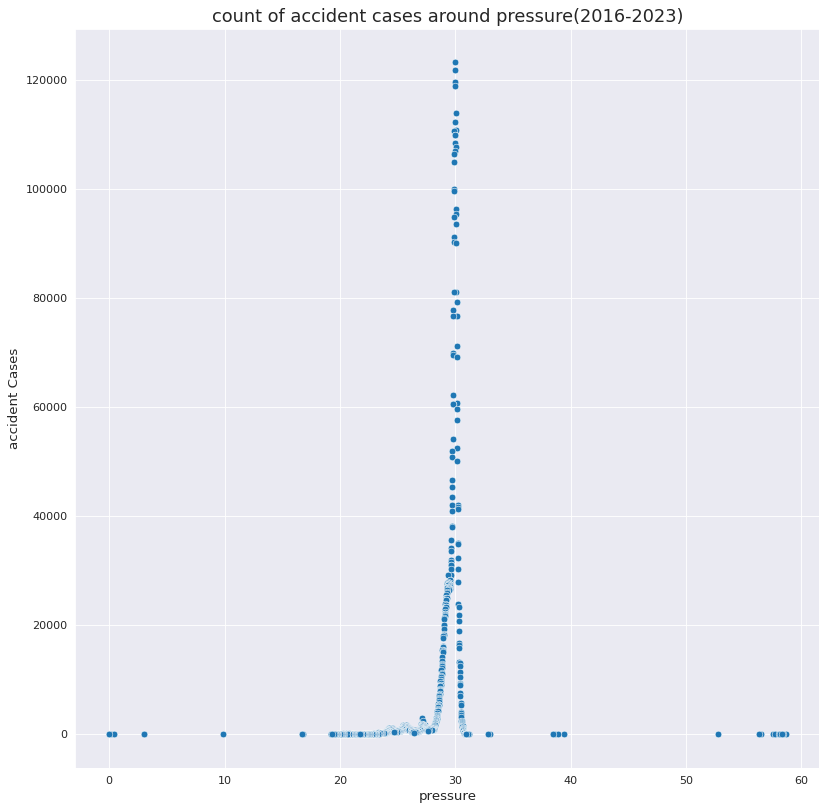

In [56]:
plt.figure(figsize=(12,12),dpi=80)
sns.scatterplot(y=pres_df['count'],x=pres_df['Pressure'],palette='mako')

plt.title('count of accident cases around pressure(2016-2023)', fontsize=16)
plt.xlabel('pressure', fontsize=12)
plt.ylabel('accident Cases', fontsize=12)    
plt.xticks(rotation=0)
plt.show()

## Wind_Chill(F)
-`conclusion`
- In most of the cases  of road accident, the wind chill range is between 51(F) - 71(F).

In [59]:
df['Wind_Chill(F)']

0           NaN
1           NaN
2          33.3
3          31.0
4          33.3
           ... 
7728389    86.0
7728390    70.0
7728391    73.0
7728392    71.0
7728393    79.0
Name: Wind_Chill(F), Length: 7728394, dtype: float64

In [58]:
len(df['Wind_Chill(F)'].unique())

1002

In [61]:
wind_chill_count= df['Wind_Chill(F)'].value_counts().sort_index()
wind_chill_df=pd.DataFrame({'windchill':wind_chill_count.index,'count':wind_chill_count.values})
wind_chill_df=wind_chill_df.sort_values(by='count',ascending=False)
wind_chill_df

,windchill,count
941,73.0,133584
940,72.0,125378
943,75.0,123065
945,77.0,122062
938,70.0,120727
...,...,...
178,-29.4,1
180,-29.2,1
30,-50.7,1
27,-51.2,1


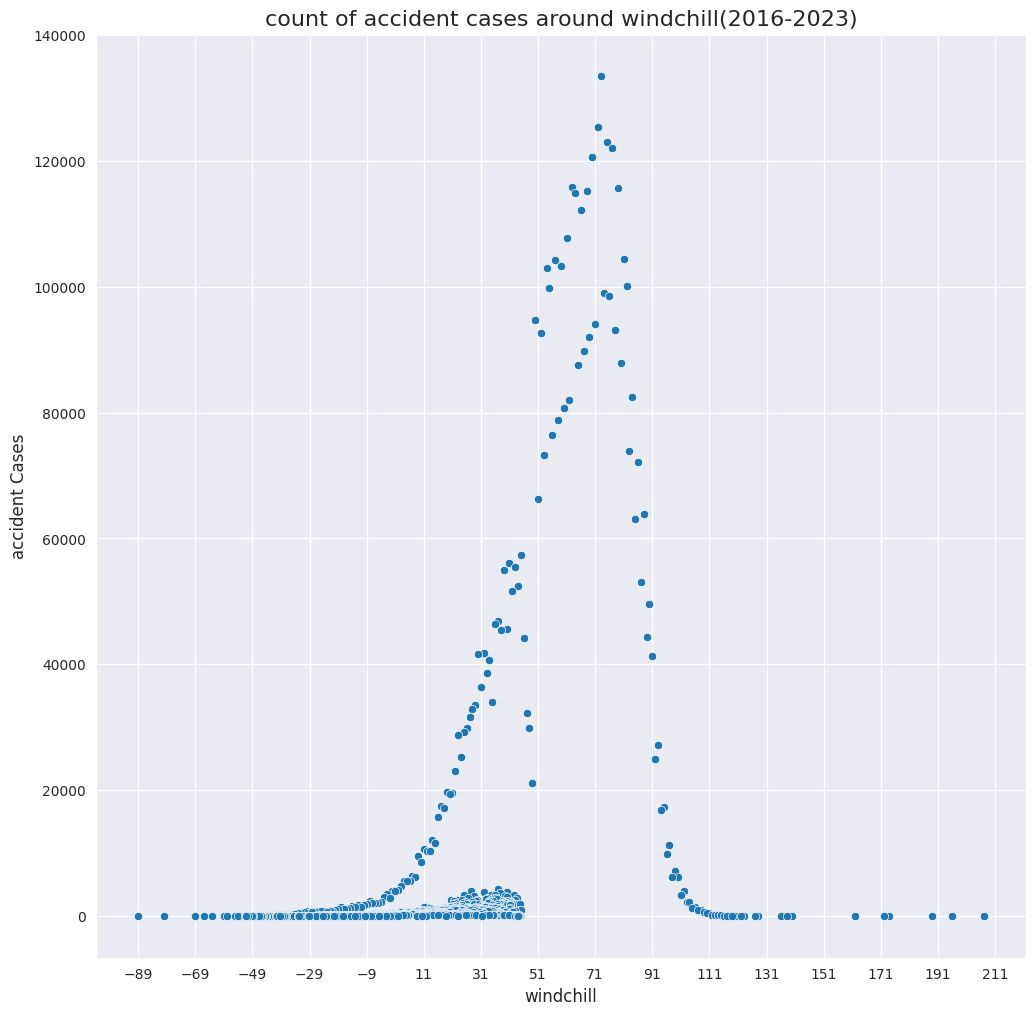

In [65]:
plt.figure(figsize=(12,12),dpi=100)
sns.scatterplot(y=wind_chill_df['count'],x=wind_chill_df['windchill'],palette='mako')

plt.title('count of accident cases around windchill(2016-2023)', fontsize=16)
plt.xlabel('windchill', fontsize=12)
plt.ylabel('accident Cases', fontsize=12)    
plt.xticks(ticks=range(int(wind_chill_df['windchill'].min()), int(wind_chill_df['windchill'].max()) + 20, 20))
plt.show()

## Wind_Speed(mph)
- `conclusion`
- For around 90% of road accident cases, the wind speed range is between 0(mph) - 20(mph).

In [66]:
df['Wind_Speed(mph)']

0           NaN
1           NaN
2           3.5
3           4.6
4           3.5
           ... 
7728389    13.0
7728390     6.0
7728391    10.0
7728392     8.0
7728393     7.0
Name: Wind_Speed(mph), Length: 7728394, dtype: float64

In [67]:
len(df['Wind_Speed(mph)'].unique())

185

In [69]:
wind_speed_count= df['Wind_Speed(mph)'].value_counts().sort_index()
wind_speed_df=pd.DataFrame({'windspeed':wind_speed_count.index,'count':wind_speed_count.values})
wind_speed_df=wind_speed_df.sort_values(by='count',ascending=False)
wind_speed_df

,windspeed,count
0,0.0,961643
8,5.0,534875
10,6.0,517199
5,3.0,514123
12,7.0,480904
...,...,...
155,157.0,1
114,81.7,1
158,166.9,1
111,79.0,1


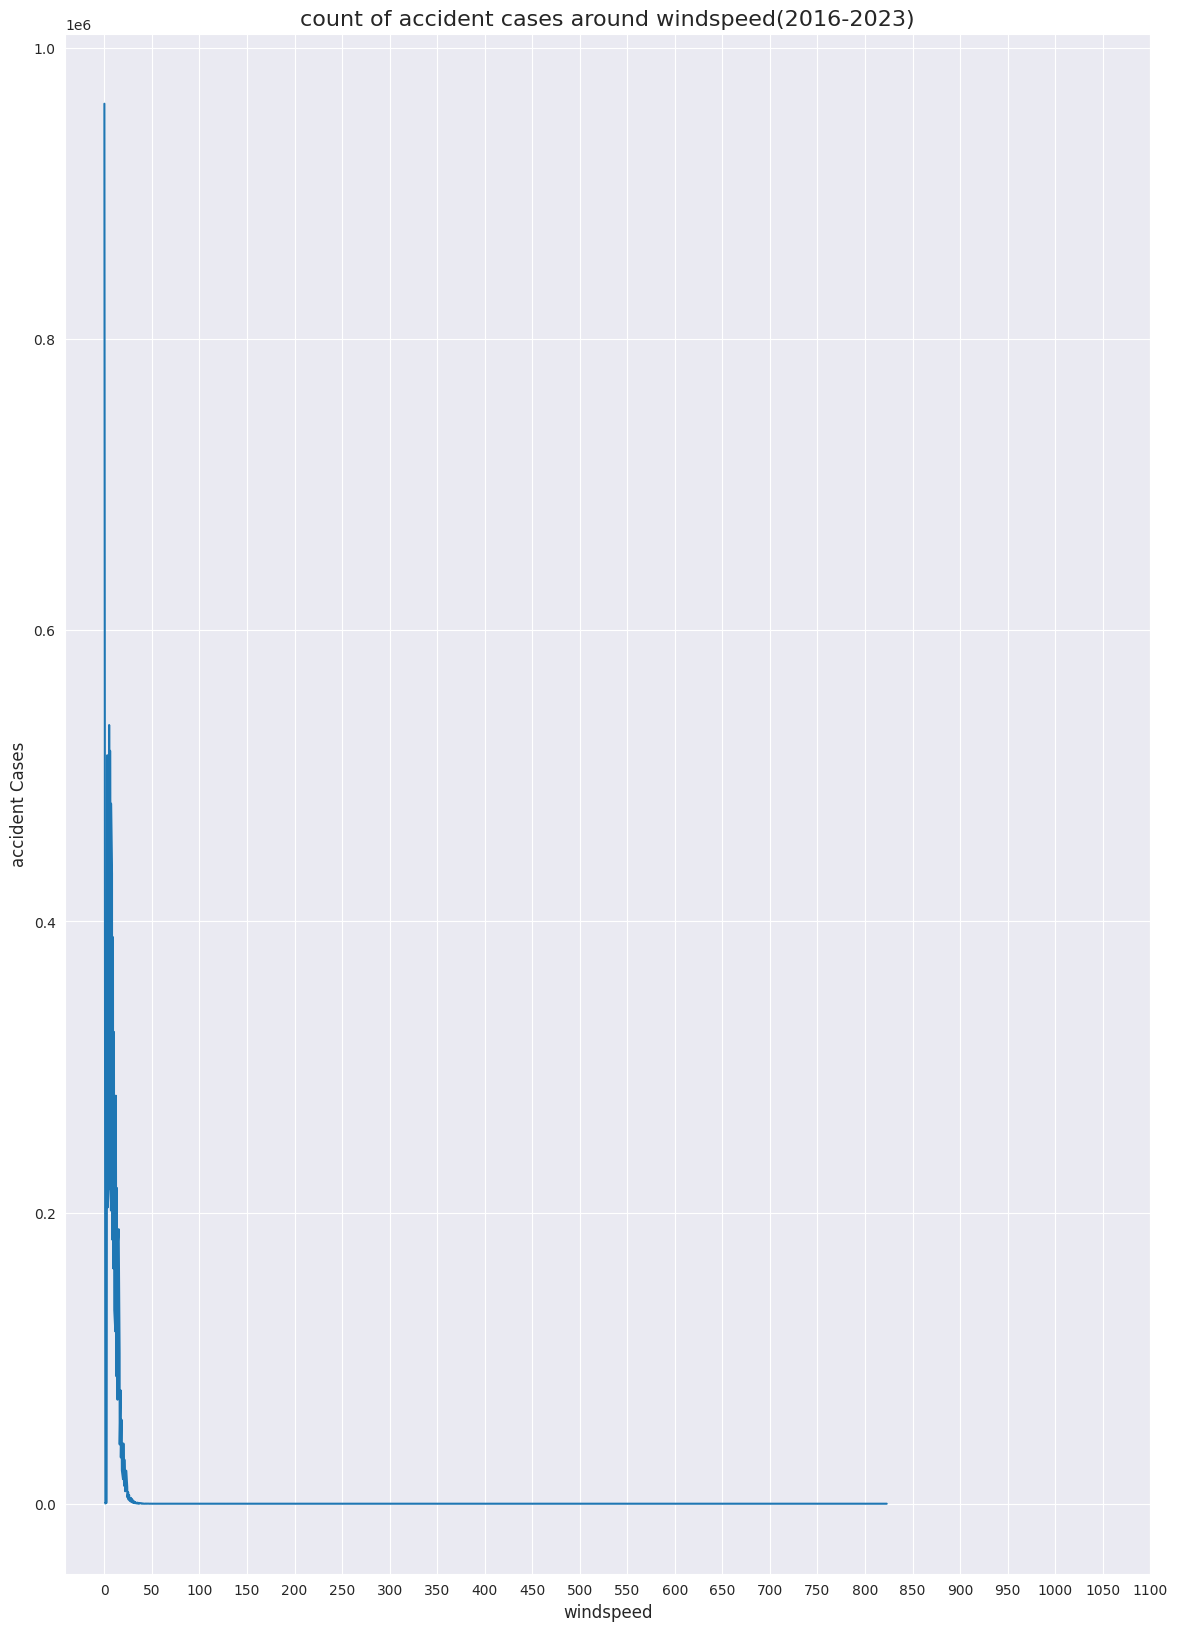

In [80]:
plt.figure(figsize=(14,20),dpi=100)
sns.lineplot(y=wind_speed_df['count'].head(100),x=wind_speed_df['windspeed'].head(100),palette='mako')

plt.title('count of accident cases around windspeed(2016-2023)', fontsize=16)
plt.xlabel('windspeed', fontsize=12)
plt.ylabel('accident Cases', fontsize=12)    
plt.xticks(ticks=range(int(wind_speed_df['windspeed'].min()), int(wind_speed_df['windspeed'].max()) + 50, 50))
plt.show()

## Visibility(mi)
- `conclusion`
- In maximum cases  of road accident, the Visibility range is between 9(mi) - 10(mi).

In [98]:
df['Visibility(mi)']

0          10.0
1          10.0
2          10.0
3           9.0
4           6.0
           ... 
7728389    10.0
7728390    10.0
7728391    10.0
7728392    10.0
7728393     7.0
Name: Visibility(mi), Length: 7728394, dtype: float64

In [82]:
len(df['Visibility(mi)'].unique())

93

In [90]:
visibility_count= df['Visibility(mi)'].value_counts().sort_index()
visibility_df=pd.DataFrame({'visibility':visibility_count.index,'count':visibility_count.values})
visibility_df=visibility_df.sort_values(by='count',ascending=False)
visibility_df

,visibility,count
46,10.0,6070231
43,7.0,217027
45,9.0,188529
44,8.0,149975
39,5.0,144153
...,...,...
87,110.0,1
67,46.0,1
75,67.0,1
90,130.0,1


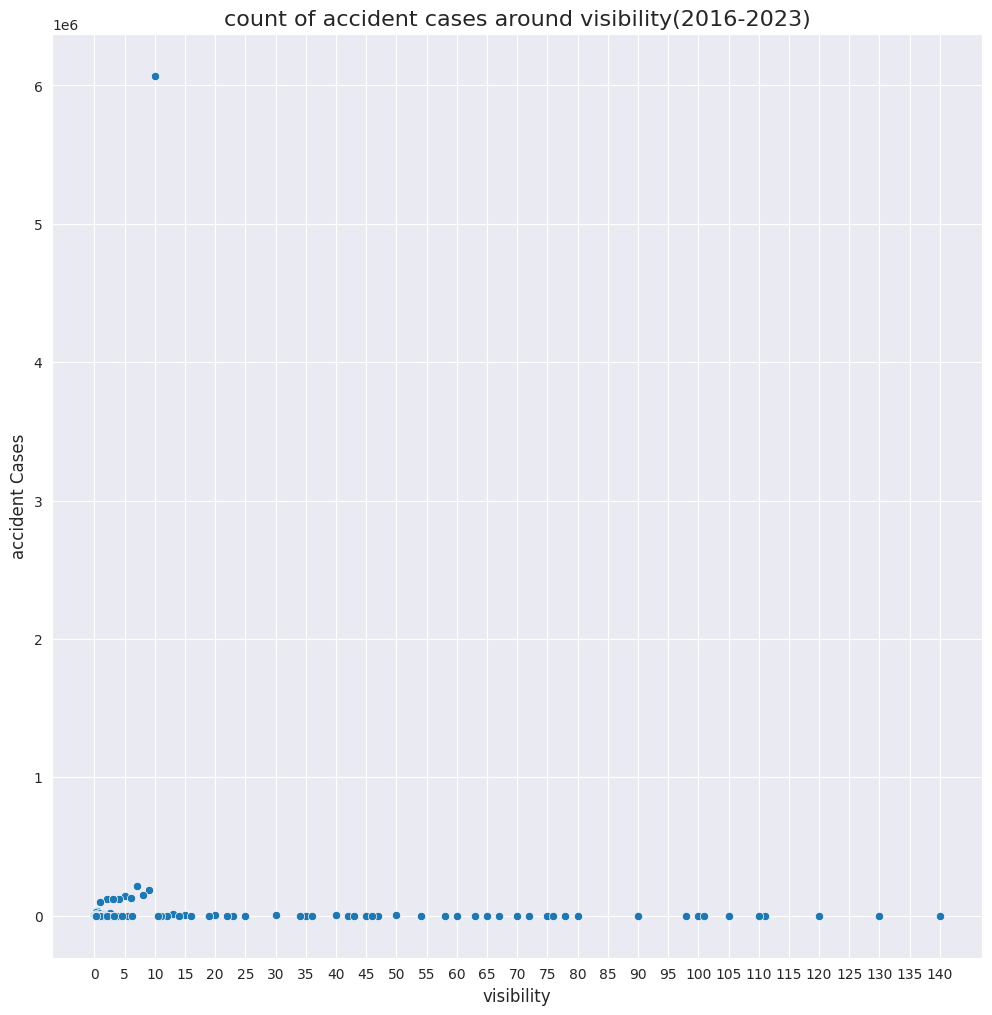

In [97]:
plt.figure(figsize=(12,12),dpi=100)

sns.scatterplot(y=visibility_df['count'],x=visibility_df['visibility'],palette='mako')

plt.title('count of accident cases around visibility(2016-2023)', fontsize=16)
plt.xlabel('visibility', fontsize=12)
plt.ylabel('accident Cases', fontsize=12)    
plt.xticks(ticks=range(int(visibility_df['visibility'].min()), int(visibility_df['visibility'].max()) + 5, 5))
plt.show()


## weather_condition 
- `conclusion`
 - In most of the cases (30.69%) the weather was Fair and approximately in 13% cases it was mostly cloudy.

In [105]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Cases':'Weather_Condition'})

In [106]:
weather_condition_df

,Weather_Condition,count
0,Fair,2560802
1,Mostly Cloudy,1016195
2,Cloudy,817082
3,Clear,808743
4,Partly Cloudy,698972
5,Overcast,382866
6,Light Rain,352957
7,Scattered Clouds,204829
8,Light Snow,128680
9,Fog,99238


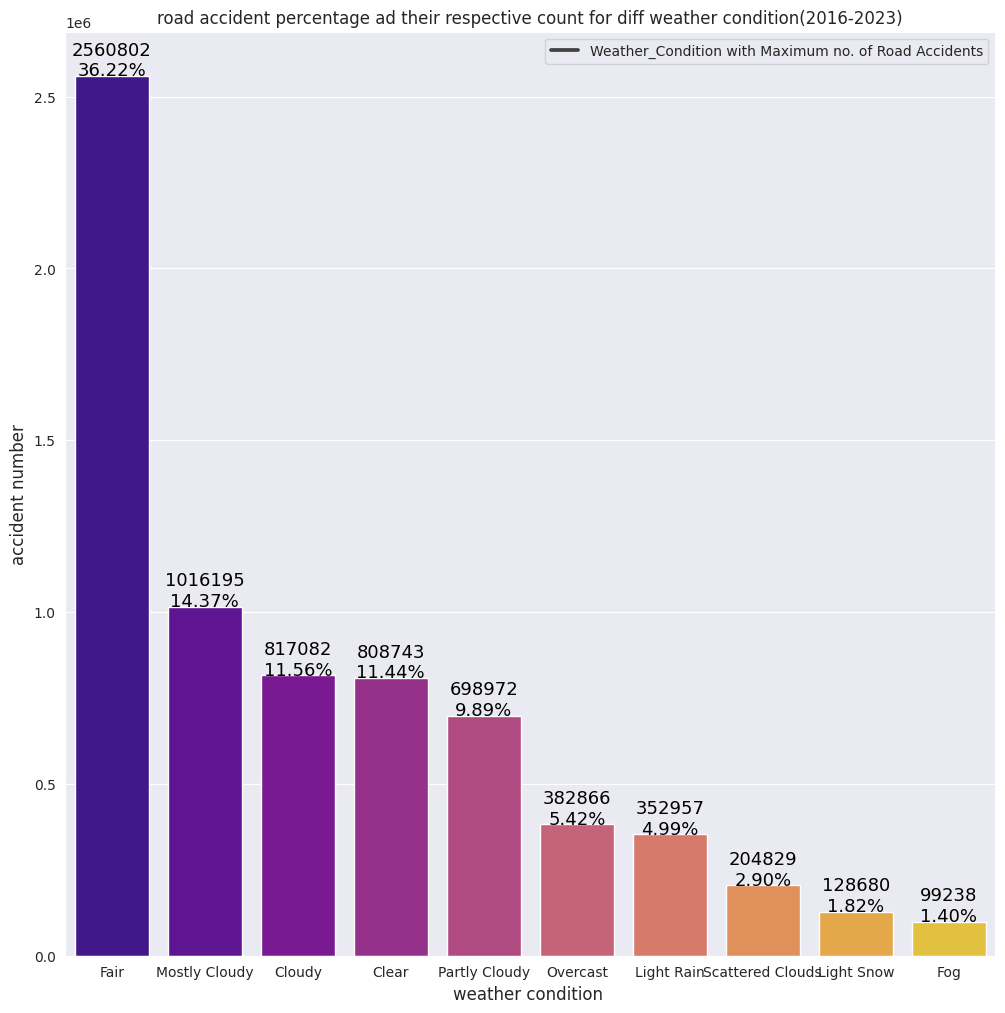

In [112]:
plt.figure(figsize=(12,12))
sns.barplot(y=weather_condition_df['count'], x=weather_condition_df['Weather_Condition'], palette='plasma')
total=weather_condition_df['count'].sum()
for i,(index,row) in enumerate(weather_condition_df.iterrows()):
    count=row['count']
    percentage=(row['count']/total)*100
    plt.text(i,row['count'],f'{count}\n{percentage:.2f}%',ha='center',color='black',fontsize=13)

plt.title('road accident percentage ad their respective count for diff weather condition(2016-2023)', fontsize=12)
plt.xlabel('weather condition ', fontsize=12)
plt.ylabel('accident number', fontsize=12)    
plt.xticks(rotation=0)
plt.legend(labels=['Weather_Condition with Maximum no. of Road Accidents'])
plt.show()

# Start Latitide and Longitude
- dencity of accident occured  in coastal area of usa is more.

In [67]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [69]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

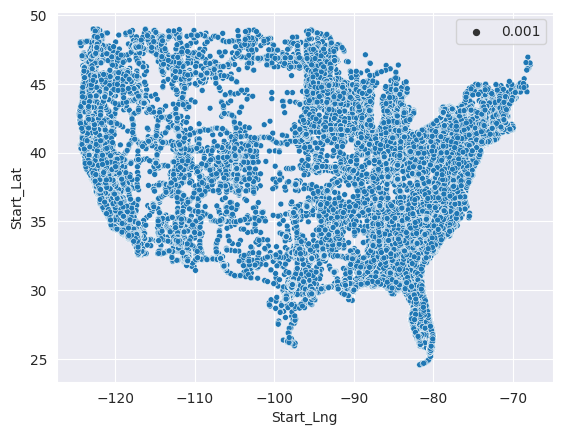

In [78]:
sample_df=df.sample(int(0.1*len(df)))
sns.scatterplot(data=sample_df,x='Start_Lng',y='Start_Lat',size=0.001)

In [79]:
import folium

In [86]:
lat,lng=df.Start_Lat[0],df.Start_Lng[0]
lat,lng

(39.865147, -84.058723)

In [92]:
map=folium.Map()
for index,row in df.sample(1000).iterrows():
    lat=row['Start_Lat']
    lng=row['Start_Lng']
    marker=folium.Marker((lat,lng))
    marker.add_to(map)
map

In [96]:
map=folium.Map()
[folium.Marker((row['Start_Lat'],row['Start_Lng'])).add_to(map) for index ,row in df.sample(1000).iterrows()]
map

In [103]:
from folium.plugins import HeatMap
from IPython.display import display
sampled_df = df.sample(1000)
locations=list(zip(sampled_df['Start_Lat'], sampled_df['Start_Lng']))
map=folium.Map(location=[sampled_df['Start_Lat'].mean(),sampled_df['Start_Lng'].mean()],zoom_start=10)
HeatMap(locations).add_to(map)
display(map)

# Ask & answer 

- Are there more accidents in warmer or colder areas?

- Which 5 states have the highest number of accidents? How about per capita?

- Does New York show up in the data? If yes, why is the count lower if this the most populated city.

- Among the top 100 cities in number of accidents, which states do they belong to most frequently.

- What time of the day are accidents most frequent in? - ANSWERED

- Which days of the week have the most accidents?

- Which months have the most accidents?

- What is the trend of accidents year over year (decreasing/increasing?)

- When is accidents per unit of traffic the highest.